# Data Dive: Team 8
 - Harper Kates - hypothesis idea generator, primary coder for dummy variables and median fill-in
 - Karen Johnson - presenter, hypothesis idea generator, primary coder for fill-in null values and alternate code for dummy variables, and hypothesis evaluation
 - Becky Seipelt-Thiemann - hypothesis idea generator, primary coder for damage, highend options, city, transmission, result writing with group input, and hypothesis evaluation
 - Lala Yamazaki - Master notebook keeper, hypothesis idea generator, primary coder for inital plots and model generation, and hypothesis evaluation
 - Kirstin Tretter - hypothesis idea generator, decision making when group was stuck, polishing of document including markdown, primary coder for dropping high frequency dummy variables, and hypothesis evaluation
 - Muqtasid N Qureshi - hypothesis idea generator, primary coder wheel drive conversion and for luxury vehicle which was not ultimately used but was tried, and hypothesis evaluation

## Section 1: Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import seaborn as sns

plt.style.use('seaborn')

/var/folders/17/zsnqyy7x4jv5xx6j7nvhd_l40000gn/T/ipykernel_81247/1600515678.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


## Section 2: Import Data

In [2]:
df_carsale = pd.read_csv("data/CarSales_DataDive.csv", index_col = 0, header = 0)
# import data

/var/folders/17/zsnqyy7x4jv5xx6j7nvhd_l40000gn/T/ipykernel_81247/1350031286.py:1: DtypeWarning: Columns (1,2,3,10,11,12,13,14,15,17,18,22,23,26,27,30,31,35,38,41,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df_carsale = pd.read_csv("data/CarSales_DataDive.csv", index_col = 0, header = 0)


In [3]:
df_carsale.info()
# view dataset info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215646 entries, 273335 to 119691
Data columns (total 48 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   city                     206239 non-null  object 
 1   bed                      1575 non-null    object 
 2   body_type                205308 non-null  object 
 3   city_fuel_economy        173883 non-null  float64
 4   combine_fuel_economy     0 non-null       float64
 5   daysonmarket             206239 non-null  float64
 6   dealer_zip               206239 non-null  float64
 7   engine_cylinders         199075 non-null  float64
 8   engine_displacement      194191 non-null  float64
 9   engine_type              199075 non-null  object 
 10  exterior_color           206234 non-null  object 
 11  frame_damaged            111298 non-null  object 
 12  franchise_dealer         206239 non-null  object 
 13  franchise_make           152719 non-null  object 
 14 

In [4]:
df_carsale.shape
# see the shape

(215646, 48)

#### Explanation of Data
 - The dataset consists of 215,646 observations and 48 features. About half of the features are floats, and the rest are objects. It looks like there are null values in almost every column. We will need to clean the data by dealing with the null values, and convert any object features that we would like to use into types that can be used in regression analysis.

## Section 3: Create plots to visualize data
### Our Hypotheses for the Data
- Hypothesis 1: The average price depends on the make of the car
- Hypothesis 2: The vehicle price increases as horsepower increases.
- Hypothesis 3: The average price depends on the type of vehicle.
- Hypothesis 4: The vehicle price will decrease with more days on market.

### Section 3a: Create a Barplot for make and average price
 - Create a barplot for average make and price

In [5]:
df_result = df_carsale.groupby("make")["price"].mean()
df_result = df_result.reset_index()
df_result = df_result.sort_values(by = "price", ascending=False)
df_result
# execute a new dataframe showing the mean of price and reset index to show from highest to lowest

,make,price
8,Bugatti,1.244996e+06
54,Rolls-Royce,2.547237e+05
42,McLaren,2.416322e+05
33,Lamborghini,2.334825e+05
18,Ferrari,2.233355e+05
...,...,...
44,Mercury,5.735486e+03
62,Suzuki,5.730516e+03
56,Saab,5.719857e+03
57,Saturn,5.132545e+03


Text(0, 0.5, 'Make')

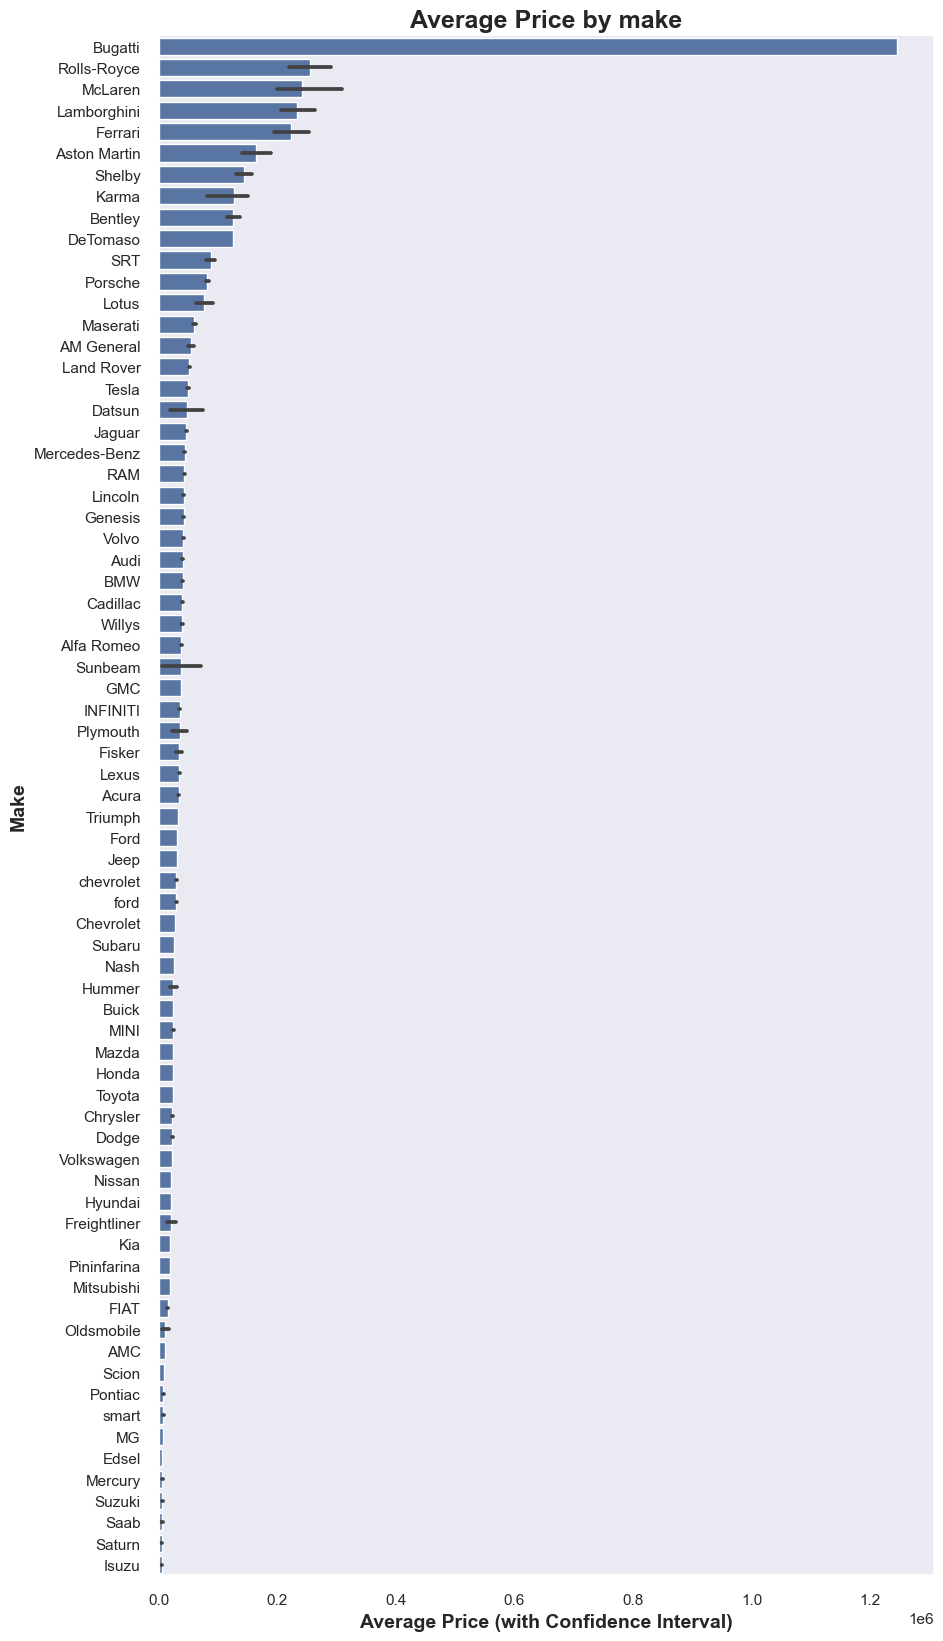

In [6]:
sns.set(style = "dark")
plt.figure(figsize=(10, 20))
sns.barplot(x = "price", y = "make", data = df_carsale, order = df_result["make"], color="b", errorbar=('ci', 95))
plt.title("Average Price by make", fontweight="bold", fontsize="18", horizontalalignment="center")
plt.xlabel("Average Price (with Confidence Interval)", fontweight='bold', fontsize='14', horizontalalignment='center')
plt.ylabel("Make", fontweight='bold', fontsize='14', horizontalalignment='center')
# create plt using seaborn

#### Interpretation
 - Average price does appear to depend on the make of car.  We can see this in the mean (bar) and standard deviation (line on bar).  Bugatti appears to be an extreme outlier.

### Section 3b: Create a scatterplot for horsepower and price
 - Create a scatterplot for horsepower and price

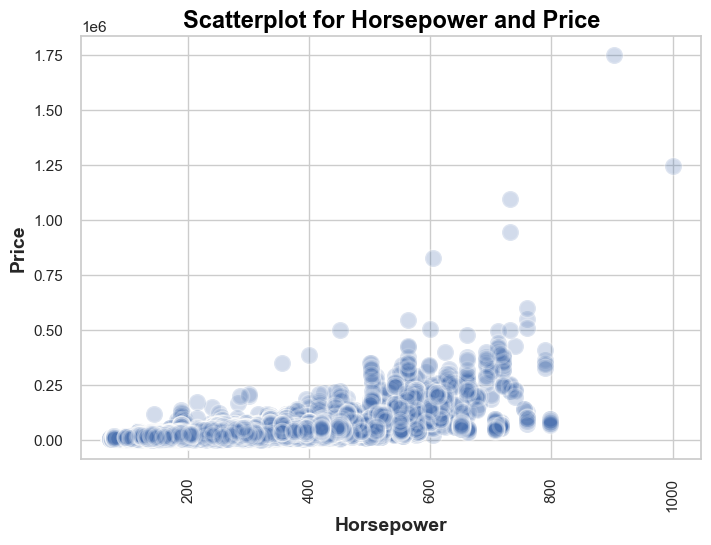

In [7]:
sns.set(style="whitegrid")
plt.xticks(rotation=90)
#plt.figure(figsize=(10, 10))
plt.title("Scatterplot for Horsepower and Price", fontweight='bold', color = "black", fontsize='17', horizontalalignment='center')
sns.scatterplot(x = "horsepower", y = "price",  data = df_carsale, alpha=.25, edgecolor = "white", linewidth = 2, s = 150)
plt.xlabel("Horsepower", fontweight="bold", fontsize='14', horizontalalignment='center')
plt.ylabel("Price", fontweight='bold', fontsize="14", horizontalalignment='center')
plt.show()
# create a scatterplot

#### Interpretation
 - While trending upwards, there appears to be little correlation of horsepower to price, and no obvious linear relationship.  There are also 2 extreme outliers for both price and horsepower.

### Section 3c: Create a Boxplot for price and type of car
 - Create a Boxplot for price and type of car

Text(0, 0.5, 'Type of car')

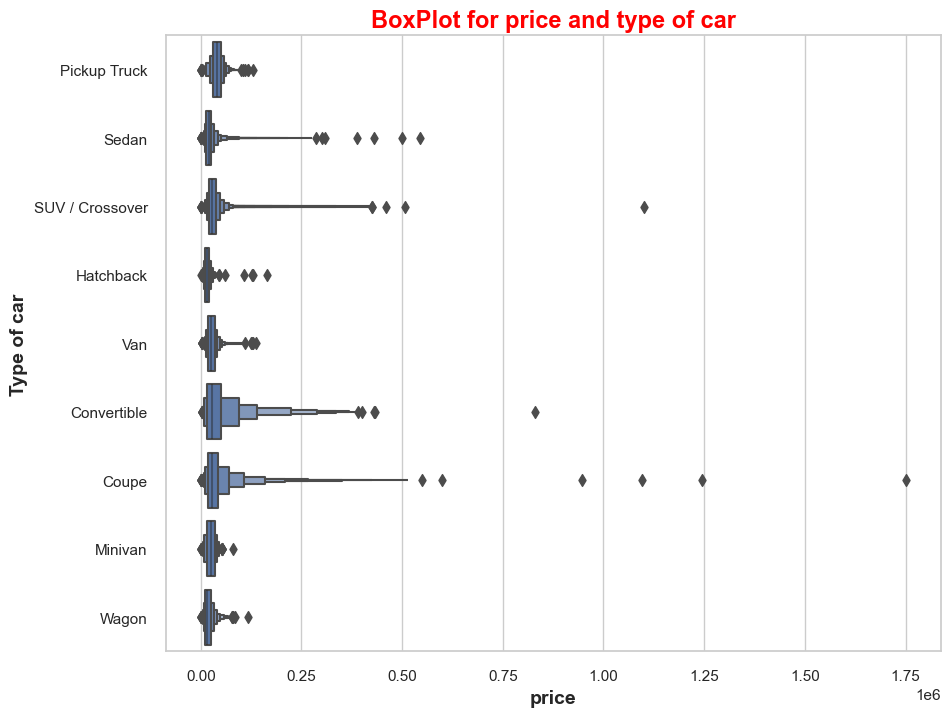

In [8]:
plt.figure(figsize=(10,8))
plt.title('BoxPlot for price and type of car', fontweight='bold', color = 'red', fontsize='17', horizontalalignment='center')
sns.boxenplot( x = "price", y = "body_type", data = df_carsale, color = "b")
plt.xlabel("price", fontweight='bold', fontsize='14', horizontalalignment='center')
plt.ylabel("Type of car", fontweight='bold', fontsize='14', horizontalalignment='center')
# create a boxplot for Price by type of car

#### Interpretation
 - Average price does appear to depend on car type as shown by the mid-point of the box diagrams.  We also see outliers, particularly in the coupe type.

### Section 3d: Create a scatterplot for Price and Days on Market with Owner count
 - Create a Boxplot for price and type of car

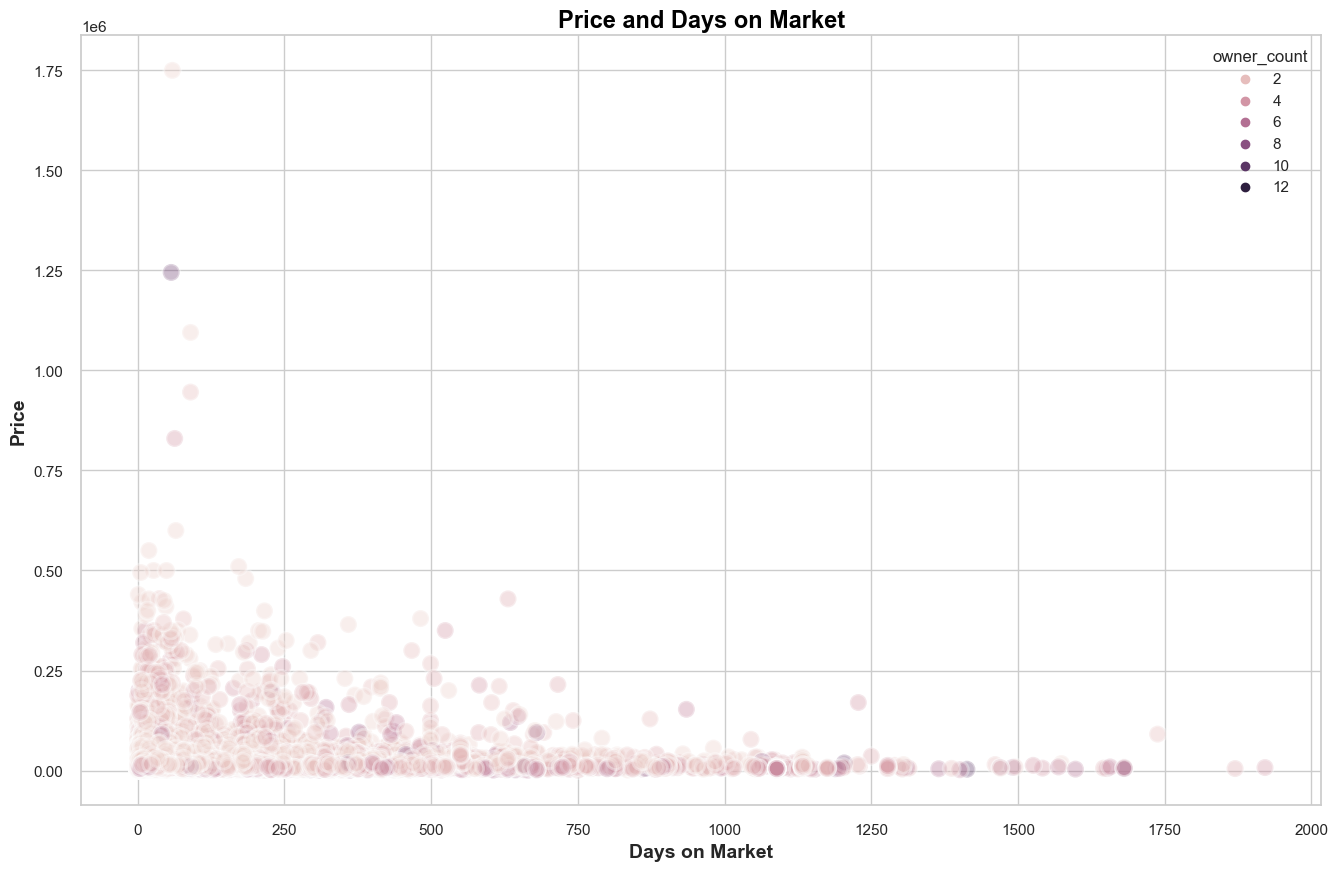

In [9]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 10))
plt.title("Price and Days on Market", fontweight='bold', color = "black", fontsize='17', horizontalalignment='center')
sns.scatterplot(x = "daysonmarket", y = "price",  data = df_carsale, hue = "owner_count", alpha=.35, edgecolor = "white", linewidth = 2, s = 150)
plt.xlabel("Days on Market", fontweight="bold", fontsize='14', horizontalalignment='center')
plt.ylabel("Price", fontweight='bold', fontsize="14", horizontalalignment='center')
plt.show()
# create a scatterplot for days on Market and price with Owner count

#### Interpretation
 - There is no relationship of price by days on market in the larger dataset.  There is more variability in price at fewer days, which probably represents new cars which are in the 0-2 owner count category.  Perhaps new and non-new should be modeled separately.
 
#### Final Thoughts
 - Make and car type appear to influence price based on these data.  Days on market may influence price, but new cars and not-new cars may need separate analyses.  We have price outliers that need to be addressed.

## Section 4: Data Cleansing
 - Dropping outliers, irrelevant features, and filling null values
### Section 4a - Removing Outliers
 - There are only six vehicles with prices over $750,000, making them outliers in the data.

In [10]:
df_carsale = df_carsale[df_carsale['price'] < 750000] #filter outliers with sale price over $750,000
df_carsale.info()
df_carsale['price'].max() #check max value of sale price

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206233 entries, 273335 to 52208
Data columns (total 48 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   city                     206233 non-null  object 
 1   bed                      1575 non-null    object 
 2   body_type                205302 non-null  object 
 3   city_fuel_economy        173880 non-null  float64
 4   combine_fuel_economy     0 non-null       float64
 5   daysonmarket             206233 non-null  float64
 6   dealer_zip               206233 non-null  float64
 7   engine_cylinders         199069 non-null  float64
 8   engine_displacement      194186 non-null  float64
 9   engine_type              199069 non-null  object 
 10  exterior_color           206228 non-null  object 
 11  frame_damaged            111292 non-null  object 
 12  franchise_dealer         206233 non-null  object 
 13  franchise_make           152714 non-null  object 
 14  

599900.0

### Section 4b: Dropping observations with too many null values
 - Use the 'thresh' parameter of the dropna funtion to require a certain number of non-null values for a row to be kept.
 - Use a graph to visualize what to set the threshold to.

In [11]:
array = []
for i in range(1,48):
    array.append( len(df_carsale.dropna(thresh=i,axis=0)) )
# array for finding out the thresh

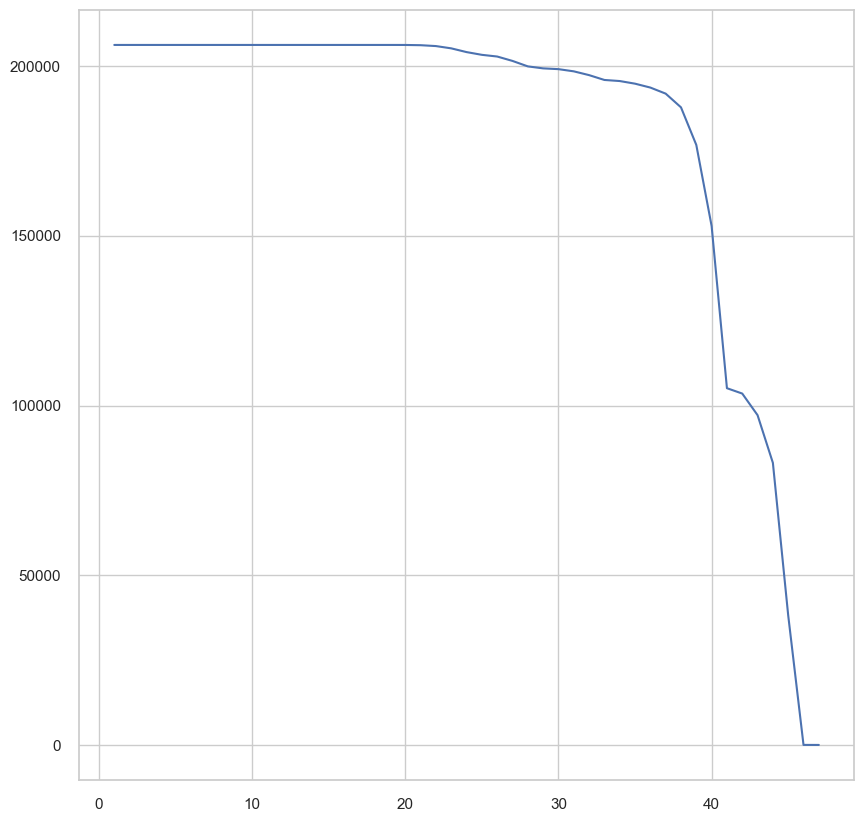

In [12]:
plt.figure(figsize=(10,10))
plt.plot(range(1,48), array)
# plot to visualize the thresh

In [13]:
df_carsale.dropna(thresh=38, inplace=True)
df_carsale.info()

#based on the above graph, we set the threshold to 38, requiring at least 38 valid entries for a row to be kept.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187847 entries, 129041 to 52208
Data columns (total 48 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   city                     187847 non-null  object 
 1   bed                      1390 non-null    object 
 2   body_type                187846 non-null  object 
 3   city_fuel_economy        170943 non-null  float64
 4   combine_fuel_economy     0 non-null       float64
 5   daysonmarket             187847 non-null  float64
 6   dealer_zip               187847 non-null  float64
 7   engine_cylinders         186571 non-null  float64
 8   engine_displacement      187748 non-null  float64
 9   engine_type              186571 non-null  object 
 10  exterior_color           187842 non-null  object 
 11  frame_damaged            106755 non-null  object 
 12  franchise_dealer         187847 non-null  object 
 13  franchise_make           137080 non-null  object 
 14  

### Section 4c: Drop Features that are Redundant or Irrelevant
- latitude, longitude, zipcode were dropped in favor of using 'city'
- city_fuel_economy and combined_fuel_economy were dropped as we decided to use 'highway_fuel_economy' as a descriptor for fuel economy overall
- exterior_color and interior_color were dropped as 'listing_color' had a more reasonable number of categories and filled this data need
- torque was removed due to having horsepower, which fills the data need
- owner_count was removed due to low counts
- Other features were qualitative and/or not relevant to price, including bed, engine_type, franchise_dealer, franchise_make, listed_date, listing_id, main_picture_url, model, savings_amount

In [14]:
df_carsale = df_carsale.drop(['bed','combine_fuel_economy','city_fuel_economy', 'dealer_zip', 'engine_type','exterior_color',
                              'franchise_dealer', 'franchise_make', 'interior_color','listed_date', 'latitude',
                              'listing_id', 'longitude', 'model', 'main_picture_url', 'owner_count', 'savings_amount', 'torque',
                              'vehicle_damage_category'], axis = 1)
df_carsale.head(10)
# dropping features that are not factors

,city,body_type,daysonmarket,engine_cylinders,engine_displacement,frame_damaged,front_legroom,fuel_tank_volume,fuel_type,has_accidents,...,mileage,price,salvage,seller_rating,theft_title,transmission_display,wheel_system_display,wheelbase,width,year
129041,Las Vegas,Sedan,66.0,4.0,2000.0,NaN,42.4 in,17.4,Gasoline,NaN,...,14.0,43960.0,NaN,4.387097,NaN,Automatic,Rear-Wheel Drive,116.0,80.3,2020.0
391889,Scottsdale,SUV / Crossover,92.0,6.0,3500.0,False,42.9 in,18.6,Gasoline,False,...,30260.0,27300.0,False,4.132075,False,6-Speed Automatic,Front-Wheel Drive,112.8,90.2,2017.0
240480,Cincinnati,Hatchback,9.0,4.0,1400.0,NaN,41.7 in,9.0,Gasoline,NaN,...,2.0,15495.0,NaN,3.764706,NaN,Continuously Variable Transmission,Front-Wheel Drive,93.9,62.8,2021.0
26718,Houston,Pickup Truck,41.0,6.0,3500.0,NaN,43.9 in,26.0,Gasoline,NaN,...,12.0,33720.0,NaN,4.490566,NaN,Automatic,4X2,145.0,96.8,2020.0
79556,Columbus,Pickup Truck,26.0,6.0,3500.0,NaN,43.9 in,26.0,Gasoline,NaN,...,7.0,45775.0,NaN,4.578947,NaN,Automatic,Four-Wheel Drive,145.0,96.8,2020.0
194983,Orlando,SUV / Crossover,19.0,6.0,3600.0,NaN,41 in,19.4,Gasoline,NaN,...,NaN,36705.0,NaN,3.745455,NaN,9-Speed Automatic,Front-Wheel Drive,120.9,78.6,2020.0
287570,Springfield,SUV / Crossover,14.0,4.0,2000.0,NaN,44.1 in,18.8,Gasoline,NaN,...,13.0,37664.0,NaN,4.076923,NaN,Automatic,All-Wheel Drive,108.9,74.4,2020.0
198362,Austin,SUV / Crossover,34.0,4.0,1600.0,False,40.4 in,12.4,Gasoline,False,...,94000.0,8997.0,False,4.000000,False,6-Speed Manual,Front-Wheel Drive,102.2,78.5,2012.0
225480,Indianapolis,Hatchback,114.0,4.0,1400.0,NaN,41.7 in,9.0,Gasoline,NaN,...,5.0,12217.0,NaN,3.480000,NaN,Continuously Variable Transmission,Front-Wheel Drive,93.9,62.8,2020.0
373915,Chicago,SUV / Crossover,7.0,4.0,2000.0,NaN,40.8 in,17.4,Gasoline,NaN,...,5.0,49305.0,NaN,4.727273,NaN,Automatic,All-Wheel Drive,113.1,82.5,2020.0


### Section 4d: Fill missing values in select features & Feature Engineering
 - Fill in NaN for city_fuel_economy and other features with median
 - Fill in NaN for savings_amount and other features with 0
 
#### Feature: is_new

In [15]:
df_carsale['is_new'] = df_carsale['is_new'].fillna(0)
def is_new(c):
    if c['is_new'] == True:
        return 1
    else:
        return 0
    
df_carsale['is_new'] = df_carsale.apply(is_new, axis = 1)
df_carsale
#creating a function to convert the True/False values in the 'is_new' feature to 1 and 0

,city,body_type,daysonmarket,engine_cylinders,engine_displacement,frame_damaged,front_legroom,fuel_tank_volume,fuel_type,has_accidents,...,mileage,price,salvage,seller_rating,theft_title,transmission_display,wheel_system_display,wheelbase,width,year
129041,Las Vegas,Sedan,66.0,4.0,2000.0,NaN,42.4 in,17.4,Gasoline,NaN,...,14.0,43960.0,NaN,4.387097,NaN,Automatic,Rear-Wheel Drive,116.0,80.3,2020.0
391889,Scottsdale,SUV / Crossover,92.0,6.0,3500.0,False,42.9 in,18.6,Gasoline,False,...,30260.0,27300.0,False,4.132075,False,6-Speed Automatic,Front-Wheel Drive,112.8,90.2,2017.0
240480,Cincinnati,Hatchback,9.0,4.0,1400.0,NaN,41.7 in,9.0,Gasoline,NaN,...,2.0,15495.0,NaN,3.764706,NaN,Continuously Variable Transmission,Front-Wheel Drive,93.9,62.8,2021.0
26718,Houston,Pickup Truck,41.0,6.0,3500.0,NaN,43.9 in,26.0,Gasoline,NaN,...,12.0,33720.0,NaN,4.490566,NaN,Automatic,4X2,145.0,96.8,2020.0
79556,Columbus,Pickup Truck,26.0,6.0,3500.0,NaN,43.9 in,26.0,Gasoline,NaN,...,7.0,45775.0,NaN,4.578947,NaN,Automatic,Four-Wheel Drive,145.0,96.8,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124319,Las Vegas,Sedan,55.0,4.0,2000.0,False,42.2 in,14.0,Gasoline,False,...,43126.0,14999.0,False,3.750000,False,Automatic,Front-Wheel Drive,106.3,70.9,2019.0
214843,Columbia,Pickup Truck,19.0,8.0,5000.0,NaN,43.9 in,26.0,Flex Fuel Vehicle,NaN,...,0.0,40888.0,NaN,5.000000,NaN,Automatic,Four-Wheel Drive,145.0,96.8,2020.0
324878,Raleigh,SUV / Crossover,34.0,6.0,3600.0,False,40.3 in,24.6,Gasoline,False,...,30574.0,29980.0,False,4.150685,False,8-Speed Automatic,Four-Wheel Drive,114.8,84.8,2017.0
291789,Springfield,SUV / Crossover,52.0,6.0,3500.0,NaN,41.4 in,19.5,Gasoline,NaN,...,2.0,56025.0,NaN,4.863636,NaN,9-Speed Automatic,All-Wheel Drive,111.0,77.7,2020.0


#### Feature: theft_title
 - change to 1 and 0, and fill missing values with 0

In [16]:
df_carsale['theft_title'] = df_carsale['theft_title'].fillna(0)
def theft_title(c):
    if c['theft_title'] == True:
        return 1
    else:
        return 0
    
df_carsale['theft_title'] = df_carsale.apply(theft_title, axis = 1)
df_carsale
# changing theft_title to numbers with 0 and 1 instead of True or False

,city,body_type,daysonmarket,engine_cylinders,engine_displacement,frame_damaged,front_legroom,fuel_tank_volume,fuel_type,has_accidents,...,mileage,price,salvage,seller_rating,theft_title,transmission_display,wheel_system_display,wheelbase,width,year
129041,Las Vegas,Sedan,66.0,4.0,2000.0,NaN,42.4 in,17.4,Gasoline,NaN,...,14.0,43960.0,NaN,4.387097,0,Automatic,Rear-Wheel Drive,116.0,80.3,2020.0
391889,Scottsdale,SUV / Crossover,92.0,6.0,3500.0,False,42.9 in,18.6,Gasoline,False,...,30260.0,27300.0,False,4.132075,0,6-Speed Automatic,Front-Wheel Drive,112.8,90.2,2017.0
240480,Cincinnati,Hatchback,9.0,4.0,1400.0,NaN,41.7 in,9.0,Gasoline,NaN,...,2.0,15495.0,NaN,3.764706,0,Continuously Variable Transmission,Front-Wheel Drive,93.9,62.8,2021.0
26718,Houston,Pickup Truck,41.0,6.0,3500.0,NaN,43.9 in,26.0,Gasoline,NaN,...,12.0,33720.0,NaN,4.490566,0,Automatic,4X2,145.0,96.8,2020.0
79556,Columbus,Pickup Truck,26.0,6.0,3500.0,NaN,43.9 in,26.0,Gasoline,NaN,...,7.0,45775.0,NaN,4.578947,0,Automatic,Four-Wheel Drive,145.0,96.8,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124319,Las Vegas,Sedan,55.0,4.0,2000.0,False,42.2 in,14.0,Gasoline,False,...,43126.0,14999.0,False,3.750000,0,Automatic,Front-Wheel Drive,106.3,70.9,2019.0
214843,Columbia,Pickup Truck,19.0,8.0,5000.0,NaN,43.9 in,26.0,Flex Fuel Vehicle,NaN,...,0.0,40888.0,NaN,5.000000,0,Automatic,Four-Wheel Drive,145.0,96.8,2020.0
324878,Raleigh,SUV / Crossover,34.0,6.0,3600.0,False,40.3 in,24.6,Gasoline,False,...,30574.0,29980.0,False,4.150685,0,8-Speed Automatic,Four-Wheel Drive,114.8,84.8,2017.0
291789,Springfield,SUV / Crossover,52.0,6.0,3500.0,NaN,41.4 in,19.5,Gasoline,NaN,...,2.0,56025.0,NaN,4.863636,0,9-Speed Automatic,All-Wheel Drive,111.0,77.7,2020.0


#### Feature: Damage - combining damage features into a single binary feature, damaged (1) or not damaged (0)

In [17]:
def zeroFalse3(c):
    if c['salvage'] == True:
        return 1
    else:
        return 0

def zeroFalse4(c):
    if c['frame_damaged'] == True:
        return 1
    else:
        return 0

def zeroFalse5(c):
    if c['has_accidents'] == True:
        return 1
    else:
        return 0

df_carsale['salvage']= df_carsale.apply(zeroFalse3,axis = 1)
df_carsale['frame_damaged']= df_carsale.apply(zeroFalse4,axis = 1)
df_carsale['has_accidents']= df_carsale.apply(zeroFalse5,axis = 1)
#making the damage category from the three damage types (salvage, frame damaged and has accidents)

In [18]:
def zeroAll(c):
    if c['damage'] > 0:
        return 1
    else:
        return 0

df_carsale['damage'] = df_carsale['salvage']+ df_carsale['frame_damaged'] + df_carsale['has_accidents']
df_carsale = df_carsale.drop(['salvage', 'frame_damaged', 'has_accidents'], axis = 1)
df_carsale['damage']= df_carsale.apply(zeroAll,axis = 1)
#add damage score (0-1)  & drop individual columns

In [19]:
df_carsale['damage'].value_counts()
# show count for damage

0    169036
1     18811
Name: damage, dtype: int64

#### Feature: major_options
 - creating a new variable that is a count of each car's options with the idea that more options may lead to a higher sale price

In [20]:
# make a new df for high end options, then split by the comma and count them
# add the count to the df
df_options = df_carsale['major_options']
#db_list = databases.split('\t')
df_options = df_options.str.split(',', expand=True)
df_options['highend_options'] = df_options.count(axis=1)

In [21]:
# Add this quantification to the big dataset and drop the original
df_carsale['highend_options'] = df_options['highend_options']
df_carsale = df_carsale.drop(['major_options'], axis = 1)

In [22]:
df_carsale['highend_options'] = df_carsale['highend_options'].fillna(0)
# Fill in NaN for highend_options with 0

In [23]:
df_carsale.head(10)
#show first 10 rows

,city,body_type,daysonmarket,engine_cylinders,engine_displacement,front_legroom,fuel_tank_volume,fuel_type,height,highway_fuel_economy,...,price,seller_rating,theft_title,transmission_display,wheel_system_display,wheelbase,width,year,damage,highend_options
129041,Las Vegas,Sedan,66.0,4.0,2000.0,42.4 in,17.4,Gasoline,57.2,32.0,...,43960.0,4.387097,0,Automatic,Rear-Wheel Drive,116.0,80.3,2020.0,0,6
391889,Scottsdale,SUV / Crossover,92.0,6.0,3500.0,42.9 in,18.6,Gasoline,70.0,24.0,...,27300.0,4.132075,0,6-Speed Automatic,Front-Wheel Drive,112.8,90.2,2017.0,0,11
240480,Cincinnati,Hatchback,9.0,4.0,1400.0,41.7 in,9.0,Gasoline,58.4,38.0,...,15495.0,3.764706,0,Continuously Variable Transmission,Front-Wheel Drive,93.9,62.8,2021.0,0,4
26718,Houston,Pickup Truck,41.0,6.0,3500.0,43.9 in,26.0,Gasoline,75.6,26.0,...,33720.0,4.490566,0,Automatic,4X2,145.0,96.8,2020.0,0,5
79556,Columbus,Pickup Truck,26.0,6.0,3500.0,43.9 in,26.0,Gasoline,77.2,23.0,...,45775.0,4.578947,0,Automatic,Four-Wheel Drive,145.0,96.8,2020.0,0,11
194983,Orlando,SUV / Crossover,19.0,6.0,3600.0,41 in,19.4,Gasoline,70.7,27.0,...,36705.0,3.745455,0,9-Speed Automatic,Front-Wheel Drive,120.9,78.6,2020.0,0,9
287570,Springfield,SUV / Crossover,14.0,4.0,2000.0,44.1 in,18.8,Gasoline,67.1,26.0,...,37664.0,4.076923,0,Automatic,All-Wheel Drive,108.9,74.4,2020.0,0,13
198362,Austin,SUV / Crossover,34.0,4.0,1600.0,40.4 in,12.4,Gasoline,61.5,32.0,...,8997.0,4.000000,0,6-Speed Manual,Front-Wheel Drive,102.2,78.5,2012.0,0,1
225480,Indianapolis,Hatchback,114.0,4.0,1400.0,41.7 in,9.0,Gasoline,58.4,38.0,...,12217.0,3.480000,0,Continuously Variable Transmission,Front-Wheel Drive,93.9,62.8,2020.0,0,3
373915,Chicago,SUV / Crossover,7.0,4.0,2000.0,40.8 in,17.4,Gasoline,65.5,28.0,...,49305.0,4.727273,0,Automatic,All-Wheel Drive,113.1,82.5,2020.0,0,8


In [24]:
df_carsale.info()
# show info on df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187847 entries, 129041 to 52208
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   city                  187847 non-null  object 
 1   body_type             187846 non-null  object 
 2   daysonmarket          187847 non-null  float64
 3   engine_cylinders      186571 non-null  float64
 4   engine_displacement   187748 non-null  float64
 5   front_legroom         187834 non-null  object 
 6   fuel_tank_volume      187758 non-null  float64
 7   fuel_type             186577 non-null  object 
 8   height                187815 non-null  float64
 9   highway_fuel_economy  170943 non-null  float64
 10  horsepower            187748 non-null  float64
 11  is_new                187847 non-null  int64  
 12  length                187815 non-null  float64
 13  listing_color         187847 non-null  object 
 14  make                  187847 non-null  object 
 

#### Feature: front_legroom - removing 'in' to convert to float

In [25]:
df_carsale["front_legroom"] = df_carsale["front_legroom"].str.replace("--","NaN")
df_carsale["front_legroom"] = df_carsale["front_legroom"].str.replace(" in","")
df_carsale["front_legroom"] = df_carsale["front_legroom"].astype(float)
df_carsale["front_legroom"] = df_carsale["front_legroom"].fillna(df_carsale["front_legroom"].median())
# drop -- and replace null values with median

#### Multiple features - using median to replace null values as there is no concrete rationale for using any other value

In [26]:
df_medians = df_carsale[["engine_cylinders", "engine_displacement", "fuel_tank_volume", "height",
                         "highway_fuel_economy", "horsepower", "length", "maximum_seating", "seller_rating",
                        "wheelbase", "width"]]
df_other = df_carsale.drop(["engine_cylinders", "engine_displacement", "fuel_tank_volume", "height",
                         "highway_fuel_economy", "horsepower", "length", "maximum_seating", "seller_rating",
                        "wheelbase", "width"], axis = 1)
for i in range(0, 11):
    df_medians.iloc[:,i] = df_medians.iloc[:,i].fillna(df_medians.iloc[:,i].median())

df_carsale = pd.concat([df_medians, df_other], axis = 1)
# replace null values with median

/var/folders/17/zsnqyy7x4jv5xx6j7nvhd_l40000gn/T/ipykernel_81247/2004004662.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_medians.iloc[:,i] = df_medians.iloc[:,i].fillna(df_medians.iloc[:,i].median())
/var/folders/17/zsnqyy7x4jv5xx6j7nvhd_l40000gn/T/ipykernel_81247/2004004662.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_medians.iloc[:,i] = df_medians.iloc[:,i].fillna(df_medians.iloc[:,i].median())
/var/folders/17/zsnqyy7x4jv5xx6j7nvhd_l40000gn/T/ipykernel_81247/2004004662.py:8: SettingWit

#### Feature: mileage
 - replace null values with 0 if the vehicle is new, or with the median mileage if the vehicle is not new

In [27]:
median = df_carsale["mileage"].median()
array = []
for index, row in df_carsale.iterrows():
    if pd.isnull(row["mileage"]):
        if row["is_new"]:
            array.append(0)
        else:
            array.append(median)
    else:
        array.append(row["mileage"])

df_carsale["mileage"] = array
df_carsale.info()
# replace null values with 0 for car that is_new and median for used car

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187847 entries, 129041 to 52208
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   engine_cylinders      187847 non-null  float64
 1   engine_displacement   187847 non-null  float64
 2   fuel_tank_volume      187847 non-null  float64
 3   height                187847 non-null  float64
 4   highway_fuel_economy  187847 non-null  float64
 5   horsepower            187847 non-null  float64
 6   length                187847 non-null  float64
 7   maximum_seating       187847 non-null  float64
 8   seller_rating         187847 non-null  float64
 9   wheelbase             187847 non-null  float64
 10  width                 187847 non-null  float64
 11  city                  187847 non-null  object 
 12  body_type             187846 non-null  object 
 13  daysonmarket          187847 non-null  float64
 14  front_legroom         187847 non-null  float64
 

#### Feature: wheel_system_display
 - use a defined function to convert all responses to either 4-wheel-drive (1), or not (0)

In [28]:

def wheeldrive(c):
    if c['wheel_system_display']=='All-Wheel Drive':
        return 1
    elif c['wheel_system_display']=='Four-Wheel Drive':
        return 1
    elif c['wheel_system_display']=='Front-Wheel Drive':
        return 0
    elif c['wheel_system_display']=='Rear-Wheel Drive':
        return 0
    elif c['wheel_system_display']=='4X2':
        return 0
    elif pd.isnull(c['wheel_system_display']):
        return 0


df_carsale['wheel_system_display']=df_carsale.apply(wheeldrive, axis=1)
# create a func with if else on wheeldrive to return 1 or 0 depending on type of wh-drive

In [29]:
df_carsale['wheel_system_display'].value_counts()
#show value count pf wheel_system_display

0    126559
1     61288
Name: wheel_system_display, dtype: int64

#### Feature: treansmission_display
 - use a defined function to convert responses to either 'Manual' or 'Automatic'

In [30]:
def transmissionsort(c):
    if c['transmission_display']=='Automatic'or c['transmission_display']=='Continuously Variable Transmission'or c['transmission_display']=='1-Speed Automatic'or c['transmission_display']=='3-Speed Automatic'or c['transmission_display']=='4-Speed Automatic'or c['transmission_display']=='5-Speed Automatic'or c['transmission_display']=='6-Speed Automatic'or c['transmission_display']=='7-Speed Automatic'or c['transmission_display']=='8-Speed Automatic'or c['transmission_display']=='9-Speed Automatic'or c['transmission_display']=='10-Speed Automatic'or c['transmission_display']=='1-Speed CVT'or c['transmission_display']=='2-Speed CVT'or c['transmission_display']=='6-Speed CVT'or c['transmission_display']=='7-Speed CVT'or c['transmission_display']=='8-Speed CVT'or c['transmission_display']=='4-Speed Automatic Overdrive'or c['transmission_display']=='5-Speed Automatic Overdrive'or c['transmission_display']=='6-Speed Automatic Overdrive'or c['transmission_display']=='7-Speed Automatic Overdrive'or c['transmission_display']=='8-Speed Automatic Overdrive'or c['transmission_display']=='9-Speed Automatic Overdrive' :
        return 'Automatic'
    elif c['transmission_display']=='1-Speed Dual Clutch' or c['transmission_display']=='6-Speed Dual Clutch'or c['transmission_display']=='7-Speed Dual Clutch'or c['transmission_display']=='8-Speed Dual Clutch'or c['transmission_display']=='9-Speed Dual Clutch'or c['transmission_display']=='3-Speed Manual'or c['transmission_display']=='4-Speed Manual'or c['transmission_display']=='5-Speed Manual'or c['transmission_display']=='6-Speed Manual'or c['transmission_display']=='7-Speed Manual'or c['transmission_display']=='8-Speed Manual'or c['transmission_display']=='9-Speed Manual'or c['transmission_display']=='Manual'or c['transmission_display']=='5-Speed Manual Overdrive'or c['transmission_display']=='6-Speed Manual Overdrive':
        return 'Manual'
    elif pd.isnull(c['transmission_display']):
        return 'Automatic'
    else:
        return 'NotFound'

df_carsale['transmission_display']=df_carsale.apply(transmissionsort, axis=1)
#sort transmission values into Automatic or Manual

In [31]:
df_carsale["transmission_display"].value_counts(dropna=False)
# show value counts

Automatic    183583
Manual         4264
Name: transmission_display, dtype: int64

### Section 4e: fill missing values with mode

In [32]:
df_carsale["transmission_display"] = df_carsale["transmission_display"].fillna("Automatic")
df_carsale["body_type"] = df_carsale["body_type"].fillna("SUV / Crossover")
df_carsale["fuel_type"] = df_carsale["fuel_type"].fillna("Gasoline")
# fill missing values with mode for 3 features

In [33]:
df_carsale.info()
#show info on df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187847 entries, 129041 to 52208
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   engine_cylinders      187847 non-null  float64
 1   engine_displacement   187847 non-null  float64
 2   fuel_tank_volume      187847 non-null  float64
 3   height                187847 non-null  float64
 4   highway_fuel_economy  187847 non-null  float64
 5   horsepower            187847 non-null  float64
 6   length                187847 non-null  float64
 7   maximum_seating       187847 non-null  float64
 8   seller_rating         187847 non-null  float64
 9   wheelbase             187847 non-null  float64
 10  width                 187847 non-null  float64
 11  city                  187847 non-null  object 
 12  body_type             187847 non-null  object 
 13  daysonmarket          187847 non-null  float64
 14  front_legroom         187847 non-null  float64
 

#### Feature: make
 - correcting issue where there were 2 makes that were listed twice

In [34]:
df_carsale["make"].value_counts(dropna=False)
#show value counts based on body_type

Ford             24161
Chevrolet        20249
Toyota           14982
Nissan           14932
Honda            13624
Jeep              8617
Hyundai           7903
Kia               7050
Dodge             6032
Volkswagen        5867
GMC               5335
ford              4849
RAM               4413
Mazda             4260
BMW               4202
Mercedes-Benz     4166
chevrolet         3937
Subaru            3325
Buick             3288
Cadillac          2903
INFINITI          2794
Lexus             2704
Audi              2408
Acura             2339
Chrysler          2304
Lincoln           2113
Volvo             1629
Mitsubishi        1456
Land Rover        1189
Porsche           1062
MINI               780
Jaguar             703
Alfa Romeo         447
Maserati           336
FIAT               282
Genesis            163
Scion              158
Pontiac            124
Bentley            113
Mercury             99
Ferrari             97
Saturn              86
Hummer              64
McLaren    

In [35]:
df_carsale = df_carsale.replace("ford", "Ford")
# replacing value so there is only one category for Ford

In [36]:
df_carsale = df_carsale.replace("chevrolet", "Chevrolet")
# replacing value so there is only one category for Chevrolet

In [37]:
df_carsale["make"].value_counts(dropna=False)
#show value counts based on make

Ford             29010
Chevrolet        24186
Toyota           14982
Nissan           14932
Honda            13624
Jeep              8617
Hyundai           7903
Kia               7050
Dodge             6032
Volkswagen        5867
GMC               5335
RAM               4413
Mazda             4260
BMW               4202
Mercedes-Benz     4166
Subaru            3325
Buick             3288
Cadillac          2903
INFINITI          2794
Lexus             2704
Audi              2408
Acura             2339
Chrysler          2304
Lincoln           2113
Volvo             1629
Mitsubishi        1456
Land Rover        1189
Porsche           1062
MINI               780
Jaguar             703
Alfa Romeo         447
Maserati           336
FIAT               282
Genesis            163
Scion              158
Pontiac            124
Bentley            113
Mercury             99
Ferrari             97
Saturn              86
Hummer              64
McLaren             51
Lamborghini         48
Aston Marti

#### Feature: city
 - use a defined function to sort cities into 5 categories based on geographical area: Southwest ('SW'), Southeast ('SE'), Midwest ('MW'), Midsouth ('MS'), or Mountain ('M')

In [38]:
def citysort(c):
    if c['city']=='Scottsdale'or c['city']=='San Jose'or c['city']=='Albuquerque'or c['city']=='Tucson'or c['city']== 'Phoenix'or c['city']== 'Las Vegas':
        return 'SW'
    elif c['city']=='Arlington'or c['city']== 'Richmond'or c['city']== 'Raleigh'or c['city']== 'Charlotte'or c['city']== 'Columbia'or c['city']== 'Orlando'or c['city']== 'Tampa'or c['city']== 'Jacksonville'or c['city']== 'Miami':
        return 'SE'
    elif c['city']=='Chicago'or c['city']== 'Madison'or c['city']== 'Louisville'or c['city']== 'Springfield'or c['city']== 'Oklahoma City'or c['city']== 'Indianapolis'or c['city']== 'Cincinnati'or c['city']== 'Columbus':
        return 'MW'
    elif c['city']=='Stafford'or c['city']== 'El Paso'or c['city']== 'Austin'or c['city']== 'Dallas'or c['city']== 'San Antonio'or c['city']== 'Houston':
        return "MS"
    elif c['city']=='Denver':
        return 'M'
    elif pd.isnull(c['city']):
        return "none"
    else:
        return "none"

df_carsale['city_category']=df_carsale.apply(citysort, axis=1)
# sort city by big geography (SW = southwest, SE = southeast, MW = midwest, MS = midsouth, M = mountain)

In [39]:
df_carsale["city_category"].value_counts(dropna=False)
#show value count

MS    54055
SE    53822
MW    43384
SW    31524
M      5062
Name: city_category, dtype: int64

In [40]:
df_carsale = df_carsale.drop(['city'], axis = 1)
df_carsale.head(10)
# dropping city as we have city category

,engine_cylinders,engine_displacement,fuel_tank_volume,height,highway_fuel_economy,horsepower,length,maximum_seating,seller_rating,wheelbase,...,make,mileage,price,theft_title,transmission_display,wheel_system_display,year,damage,highend_options,city_category
129041,4.0,2000.0,17.4,57.2,32.0,237.0,193.8,5.0,4.387097,116.0,...,Cadillac,14.0,43960.0,0,Automatic,0,2020.0,0,6,SW
391889,6.0,3500.0,18.6,70.0,24.0,290.0,198.3,7.0,4.132075,112.8,...,Ford,30260.0,27300.0,0,Automatic,0,2017.0,0,11,SW
240480,4.0,1400.0,9.0,58.4,38.0,98.0,143.1,4.0,3.764706,93.9,...,Chevrolet,2.0,15495.0,0,Automatic,0,2021.0,0,4,MW
26718,6.0,3500.0,26.0,75.6,26.0,375.0,231.9,6.0,4.490566,145.0,...,Ford,12.0,33720.0,0,Automatic,0,2020.0,0,5,MS
79556,6.0,3500.0,26.0,77.2,23.0,375.0,231.9,6.0,4.578947,145.0,...,Ford,7.0,45775.0,0,Automatic,1,2020.0,0,11,MW
194983,6.0,3600.0,19.4,70.7,27.0,310.0,204.3,8.0,3.745455,120.9,...,Chevrolet,0.0,36705.0,0,Automatic,0,2020.0,0,9,SE
287570,4.0,2000.0,18.8,67.1,26.0,235.0,187.8,5.0,4.076923,108.9,...,Hyundai,13.0,37664.0,0,Automatic,1,2020.0,0,13,MW
198362,4.0,1600.0,12.4,61.5,32.0,181.0,161.8,5.0,4.000000,102.2,...,MINI,94000.0,8997.0,0,Manual,0,2012.0,0,1,MS
225480,4.0,1400.0,9.0,58.4,38.0,98.0,143.1,4.0,3.480000,93.9,...,Chevrolet,5.0,12217.0,0,Automatic,0,2020.0,0,3,MW
373915,4.0,2000.0,17.4,65.5,28.0,255.0,183.8,5.0,4.727273,113.1,...,Mercedes-Benz,5.0,49305.0,0,Automatic,1,2020.0,0,8,MW


## Section 5: Create dummy variables
 - The features for make, transmission_display, city_category, fuel_type, body_type, and listing_color were converted into dummy variables so they can be inlcuded in the regression model because these may affect price. 
 - To avoid multicollinearity, the dummy variable from each operation with the greatest number of responses was dropped.

In [41]:
df_carsale.info()
#show info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187847 entries, 129041 to 52208
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   engine_cylinders      187847 non-null  float64
 1   engine_displacement   187847 non-null  float64
 2   fuel_tank_volume      187847 non-null  float64
 3   height                187847 non-null  float64
 4   highway_fuel_economy  187847 non-null  float64
 5   horsepower            187847 non-null  float64
 6   length                187847 non-null  float64
 7   maximum_seating       187847 non-null  float64
 8   seller_rating         187847 non-null  float64
 9   wheelbase             187847 non-null  float64
 10  width                 187847 non-null  float64
 11  body_type             187847 non-null  object 
 12  daysonmarket          187847 non-null  float64
 13  front_legroom         187847 non-null  float64
 14  fuel_type             187847 non-null  object 
 

In [42]:
df_obj = df_carsale.loc[:, df_carsale.dtypes == object]
df_other = df_carsale.loc[:, df_carsale.dtypes != object]
df_obj = pd.get_dummies(df_obj)
df_carsale = pd.concat([df_obj, df_other], axis = 1).astype(float)
df_carsale = df_carsale.drop(['make_Ford', 'body_type_SUV / Crossover', 'fuel_type_Gasoline',
                             'listing_color_WHITE', 'city_category_MS', 'transmission_display_Automatic'], axis = 1)
#Automatically gets dummy variables for all object variables
#Drop highest dummy var for 6 created features

In [43]:
df_carsale.info()
#show info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187847 entries, 129041 to 52208
Columns: 109 entries, body_type_Convertible to highend_options
dtypes: float64(109)
memory usage: 157.6 MB


In [44]:
print(df_carsale.columns.tolist())
# print the list of all columns

['body_type_Convertible', 'body_type_Coupe', 'body_type_Hatchback', 'body_type_Minivan', 'body_type_Pickup Truck', 'body_type_Sedan', 'body_type_Van', 'body_type_Wagon', 'fuel_type_Biodiesel', 'fuel_type_Compressed Natural Gas', 'fuel_type_Diesel', 'fuel_type_Flex Fuel Vehicle', 'fuel_type_Hybrid', 'listing_color_BLACK', 'listing_color_BLUE', 'listing_color_BROWN', 'listing_color_GOLD', 'listing_color_GRAY', 'listing_color_GREEN', 'listing_color_ORANGE', 'listing_color_PINK', 'listing_color_PURPLE', 'listing_color_RED', 'listing_color_SILVER', 'listing_color_TEAL', 'listing_color_UNKNOWN', 'listing_color_YELLOW', 'make_Acura', 'make_Alfa Romeo', 'make_Aston Martin', 'make_Audi', 'make_BMW', 'make_Bentley', 'make_Buick', 'make_Cadillac', 'make_Chevrolet', 'make_Chrysler', 'make_Datsun', 'make_Dodge', 'make_FIAT', 'make_Ferrari', 'make_Fisker', 'make_GMC', 'make_Genesis', 'make_Honda', 'make_Hummer', 'make_Hyundai', 'make_INFINITI', 'make_Isuzu', 'make_Jaguar', 'make_Jeep', 'make_Karma',

## Section 6 - initial regression model
 - - using all data columns we generated for our inital model to make the model to generate regression results, residual and predictions, joint plot, correlation matrix, heat map, and VIF

In [45]:
X = df_carsale[['body_type_Convertible', 'body_type_Coupe', 'body_type_Hatchback', 'body_type_Minivan',
                'body_type_Pickup Truck', 'body_type_Sedan', 'body_type_Van', 'body_type_Wagon',
                'fuel_type_Biodiesel', 'fuel_type_Compressed Natural Gas', 'fuel_type_Diesel',
                'fuel_type_Flex Fuel Vehicle', 'fuel_type_Hybrid', 'listing_color_BLACK',
                'listing_color_BLUE', 'listing_color_BROWN', 'listing_color_GOLD', 
                'listing_color_GRAY', 'listing_color_GREEN', 'listing_color_ORANGE',
                'listing_color_PINK', 'listing_color_PURPLE', 'listing_color_RED', 
                'listing_color_SILVER', 'listing_color_TEAL', 'listing_color_UNKNOWN',
                'listing_color_YELLOW', 'make_Acura', 'make_Alfa Romeo', 'make_Aston Martin',
                'make_Audi', 'make_BMW', 'make_Bentley', 'make_Buick', 'make_Cadillac',
                'make_Chevrolet', 'make_Chrysler', 'make_Datsun', 'make_Dodge', 'make_FIAT',
                'make_Ferrari', 'make_Fisker', 'make_GMC', 'make_Genesis', 'make_Honda', 'make_Hummer',
                'make_Hyundai', 'make_INFINITI', 'make_Isuzu', 'make_Jaguar', 'make_Jeep', 'make_Karma',
                'make_Kia', 'make_Lamborghini', 'make_Land Rover', 'make_Lexus', 'make_Lincoln', 
                'make_Lotus', 'make_MINI', 'make_Maserati', 'make_Mazda', 'make_McLaren', 
                'make_Mercedes-Benz', 'make_Mercury', 'make_Mitsubishi', 'make_Nissan',
                'make_Oldsmobile', 'make_Pininfarina', 'make_Plymouth', 'make_Pontiac',
                'make_Porsche', 'make_RAM', 'make_Rolls-Royce', 'make_SRT', 'make_Saab', 
                'make_Saturn', 'make_Scion', 'make_Subaru', 'make_Suzuki', 'make_Toyota', 
                'make_Volkswagen', 'make_Volvo', 'make_smart', 'transmission_display_Manual', 
                'city_category_M', 'city_category_MW', 'city_category_SE', 'city_category_SW',
                'engine_cylinders', 'engine_displacement', 'fuel_tank_volume', 'height', 
                'highway_fuel_economy', 'horsepower', 'length', 'maximum_seating', 'seller_rating',
                'wheelbase', 'width', 'daysonmarket', 'front_legroom', 'is_new', 'mileage', 
                'theft_title', 'wheel_system_display', 'year', 'damage', 'highend_options']]
y = df_carsale['price']
X = sm.add_constant(X) # adding a constant

reg1 = sm.OLS(y, X).fit()

pred1 = reg1.predict(X) 

resid1 = reg1.resid
resid1

reg1.summary()
# creating multiple regression model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     5860.
Date:                Sun, 08 Oct 2023   Prob (F-statistic):               0.00
Time:                        18:10:53   Log-Likelihood:            -1.9809e+06
No. Observations:              187847   AIC:                         3.962e+06
Df Residuals:                  187738   BIC:                         3.963e+06
Df Model:                         108                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                            -1.816e+06   2.46e+04    -73.938      0.000   -1.86e+06   -1.77e+06
body_type_Convertible             1.033e+04    260.115     39.696      0.000    9815.780    1.08e+04
body_type_Coupe                   5197.3838    203.552     25.533      0.000    4798.427    5596.340
body_type_Hatchback               5041.7694    163.312     30.872      0.000    4721.681    5361.858
body_type_Minivan                  -60.8018    165.309     -0.368      0.713    -384.804     263.200
body_type_Pickup Truck           -3755.9795    180.412    -20.819      0.000   -4109.584   -3402.376
body_type_Sedan                   2717.4456    130.983     20.747      0.000    2460.723    2974.168
body_type_Van                    -4221.2858    271.181    -15.566      0.000   -4752.794   -3689.777
body_type_Wagon                   3782.9160    203.491     18.590      0.000    3384.078    4181.755
fuel_type_Biodiesel                1.11e+04    373.597     29.714      0.000    1.04e+04    1.18e+04
fuel_type_Compressed Natural Gas  -587.5780   2911.052     -0.202      0.840   -6293.172    5118.016
fuel_type_Diesel                  9984.2065    218.539     45.686      0.000    9555.875    1.04e+04
fuel_type_Flex Fuel Vehicle      -2635.6283    113.613    -23.198      0.000   -2858.308   -2412.949
fuel_type_Hybrid                  3010.1087    163.113     18.454      0.000    2690.412    3329.806
listing_color_BLACK                173.5851     67.159      2.585      0.010      41.956     305.214
listing_color_BLUE                 248.7506     88.728      2.804      0.005      74.845     422.656
listing_color_BROWN               1128.7357    245.616      4.596      0.000     647.335    1610.136
listing_color_GOLD                1236.5126    338.166      3.657      0.000     573.714    1899.311
listing_color_GRAY                   7.1053     75.528      0.094      0.925    -140.928     155.138
listing_color_GREEN               2381.3509    259.693      9.170      0.000    1872.359    2890.342
listing_color_ORANGE               333.8324    354.569      0.942      0.346    -361.114    1028.779
listing_color_PINK                1786.0154   3764.622      0.474      0.635   -5592.556    9164.587
listing_color_PURPLE              1064.0410    864.251      1.231      0.218    -629.870    2757.952
listing_color_RED                  524.0533     88.713      5.907      0.000     350.178     697.929
listing_color_SILVER              -292.8767     74.796     -3.916      0.000    -439.475    -146.278
listing_color_TEAL                -815.1780    545.454     -1.494      0.135   -1884.255     253.899
listing_color_UNKNOWN              830.2932     77.214     10.753      0.000     678.955     981.632
listing_color_YELLOW              4899.1458    511.58

In [46]:
df_reg1 = df_carsale[['body_type_Convertible', 'body_type_Coupe', 'body_type_Hatchback', 'body_type_Minivan',
                'body_type_Pickup Truck', 'body_type_Sedan', 'body_type_Van', 'body_type_Wagon',
                'fuel_type_Biodiesel', 'fuel_type_Compressed Natural Gas', 'fuel_type_Diesel',
                'fuel_type_Flex Fuel Vehicle', 'fuel_type_Hybrid', 'listing_color_BLACK',
                'listing_color_BLUE', 'listing_color_BROWN', 'listing_color_GOLD', 
                'listing_color_GRAY', 'listing_color_GREEN', 'listing_color_ORANGE',
                'listing_color_PINK', 'listing_color_PURPLE', 'listing_color_RED', 
                'listing_color_SILVER', 'listing_color_TEAL', 'listing_color_UNKNOWN',
                'listing_color_YELLOW', 'make_Acura', 'make_Alfa Romeo', 'make_Aston Martin',
                'make_Audi', 'make_BMW', 'make_Bentley', 'make_Buick', 'make_Cadillac',
                'make_Chevrolet', 'make_Chrysler', 'make_Datsun', 'make_Dodge', 'make_FIAT',
                'make_Ferrari', 'make_Fisker', 'make_GMC', 'make_Genesis', 'make_Honda', 'make_Hummer',
                'make_Hyundai', 'make_INFINITI', 'make_Isuzu', 'make_Jaguar', 'make_Jeep', 'make_Karma',
                'make_Kia', 'make_Lamborghini', 'make_Land Rover', 'make_Lexus', 'make_Lincoln', 
                'make_Lotus', 'make_MINI', 'make_Maserati', 'make_Mazda', 'make_McLaren', 
                'make_Mercedes-Benz', 'make_Mercury', 'make_Mitsubishi', 'make_Nissan',
                'make_Oldsmobile', 'make_Pininfarina', 'make_Plymouth', 'make_Pontiac',
                'make_Porsche', 'make_RAM', 'make_Rolls-Royce', 'make_SRT', 'make_Saab', 
                'make_Saturn', 'make_Scion', 'make_Subaru', 'make_Suzuki', 'make_Toyota', 
                'make_Volkswagen', 'make_Volvo', 'make_smart', 'transmission_display_Manual', 
                'city_category_M', 'city_category_MW', 'city_category_SE', 'city_category_SW',
                'engine_cylinders', 'engine_displacement', 'fuel_tank_volume', 'height', 
                'highway_fuel_economy', 'horsepower', 'length', 'maximum_seating', 'seller_rating',
                'wheelbase', 'width', 'daysonmarket', 'front_legroom', 'is_new', 'mileage', 'price',
                'theft_title', 'wheel_system_display', 'year', 'damage', 'highend_options']]
df_reg1
df_reg1 = pd.concat([df_reg1, pred1, resid1], axis=1)
df_reg1 = df_reg1.rename(columns = {0:'Price_Predicted1'})
df_reg1 = df_reg1.rename(columns = {1:'Residual1'})
df_reg1.head(10)
# create a regression table 1 to include columns and rename 0 and 1 titles

,body_type_Convertible,body_type_Coupe,body_type_Hatchback,body_type_Minivan,body_type_Pickup Truck,body_type_Sedan,body_type_Van,body_type_Wagon,fuel_type_Biodiesel,fuel_type_Compressed Natural Gas,...,is_new,mileage,price,theft_title,wheel_system_display,year,damage,highend_options,Price_Predicted1,Residual1
129041,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,14.0,43960.0,0.0,0.0,2020.0,0.0,6.0,39145.565110,4814.434890
391889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,30260.0,27300.0,0.0,0.0,2017.0,0.0,11.0,27515.688756,-215.688756
240480,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,15495.0,0.0,0.0,2021.0,0.0,4.0,18339.749371,-2844.749371
26718,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,12.0,33720.0,0.0,0.0,2020.0,0.0,5.0,46408.098625,-12688.098625
79556,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,7.0,45775.0,0.0,1.0,2020.0,0.0,11.0,51146.976537,-5371.976537
194983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,36705.0,0.0,0.0,2020.0,0.0,9.0,41381.332640,-4676.332640
287570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,13.0,37664.0,0.0,1.0,2020.0,0.0,13.0,40948.618878,-3284.618878
198362,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,94000.0,8997.0,0.0,0.0,2012.0,0.0,1.0,10235.618131,-1238.618131
225480,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,5.0,12217.0,0.0,0.0,2020.0,0.0,3.0,16634.080008,-4417.080008
373915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,5.0,49305.0,0.0,1.0,2020.0,0.0,8.0,50531.886707,-1226.886707


/var/folders/17/zsnqyy7x4jv5xx6j7nvhd_l40000gn/T/ipykernel_81247/3226953788.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Text(65.34722222222221, 0.5, 'Residual')

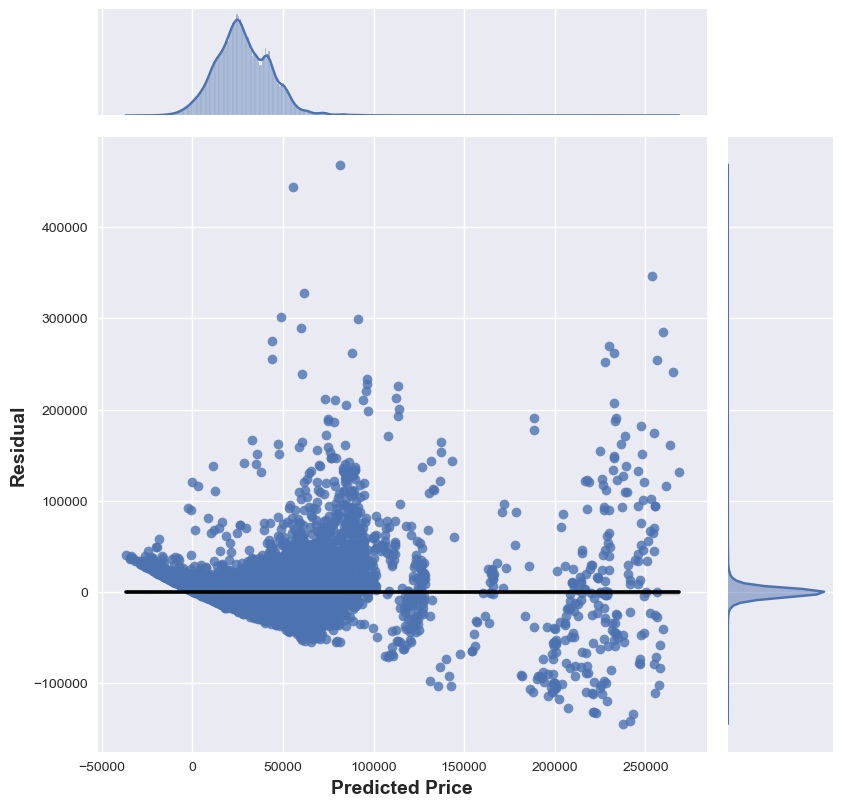

In [47]:
plt.style.use('seaborn')
sns.jointplot(x=pred1, y=resid1, kind = "reg", data = df_reg1, ratio=5, height = 8, 
              line_kws={'color': 'black'})
plt.xlabel("Predicted Price", fontweight='bold', fontsize='14', horizontalalignment='center')
plt.ylabel("Residual", fontweight='bold', fontsize='14', horizontalalignment='center')
# create a jointplot for Predicted Price and Residual

 - The residuals plot does not show any obvious pattern, which means that a linear model is appropriate for this situation.

In [48]:
df_feature1 = df_carsale[['body_type_Convertible', 'body_type_Coupe', 'body_type_Hatchback', 'body_type_Minivan',
                'body_type_Pickup Truck', 'body_type_Sedan', 'body_type_Van', 'body_type_Wagon',
                'fuel_type_Biodiesel', 'fuel_type_Compressed Natural Gas', 'fuel_type_Diesel',
                'fuel_type_Flex Fuel Vehicle', 'fuel_type_Hybrid', 'listing_color_BLACK',
                'listing_color_BLUE', 'listing_color_BROWN', 'listing_color_GOLD', 
                'listing_color_GRAY', 'listing_color_GREEN', 'listing_color_ORANGE',
                'listing_color_PINK', 'listing_color_PURPLE', 'listing_color_RED', 
                'listing_color_SILVER', 'listing_color_TEAL', 'listing_color_UNKNOWN',
                'listing_color_YELLOW', 'make_Acura', 'make_Alfa Romeo', 'make_Aston Martin',
                'make_Audi', 'make_BMW', 'make_Bentley', 'make_Buick', 'make_Cadillac',
                'make_Chevrolet', 'make_Chrysler', 'make_Datsun', 'make_Dodge', 'make_FIAT',
                'make_Ferrari', 'make_Fisker', 'make_GMC', 'make_Genesis', 'make_Honda', 'make_Hummer',
                'make_Hyundai', 'make_INFINITI', 'make_Isuzu', 'make_Jaguar', 'make_Jeep', 'make_Karma',
                'make_Kia', 'make_Lamborghini', 'make_Land Rover', 'make_Lexus', 'make_Lincoln', 
                'make_Lotus', 'make_MINI', 'make_Maserati', 'make_Mazda', 'make_McLaren', 
                'make_Mercedes-Benz', 'make_Mercury', 'make_Mitsubishi', 'make_Nissan',
                'make_Oldsmobile', 'make_Pininfarina', 'make_Plymouth', 'make_Pontiac',
                'make_Porsche', 'make_RAM', 'make_Rolls-Royce', 'make_SRT', 'make_Saab', 
                'make_Saturn', 'make_Scion', 'make_Subaru', 'make_Suzuki', 'make_Toyota', 
                'make_Volkswagen', 'make_Volvo', 'make_smart', 'transmission_display_Manual', 
                'city_category_M', 'city_category_MW', 'city_category_SE', 'city_category_SW',
                'engine_cylinders', 'engine_displacement', 'fuel_tank_volume', 'height', 
                'highway_fuel_economy', 'horsepower', 'length', 'maximum_seating', 'seller_rating',
                'wheelbase', 'width', 'daysonmarket', 'front_legroom', 'is_new', 'mileage', 'price',
                'theft_title', 'wheel_system_display', 'year', 'damage', 'highend_options']]
df_feature1.info()
# created new dataframe with all X features and without const

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187847 entries, 129041 to 52208
Columns: 109 entries, body_type_Convertible to highend_options
dtypes: float64(109)
memory usage: 157.6 MB


In [49]:
pd.set_option('display.max_rows', 100)
X_corr = X.drop(['const'], axis=1)
corrMatrix1 = df_feature1.corr()
df_corrMatrix1 = pd.DataFrame(corrMatrix1)
df_corrMatrix1
# Create correlation Matrix1

,body_type_Convertible,body_type_Coupe,body_type_Hatchback,body_type_Minivan,body_type_Pickup Truck,body_type_Sedan,body_type_Van,body_type_Wagon,fuel_type_Biodiesel,fuel_type_Compressed Natural Gas,...,daysonmarket,front_legroom,is_new,mileage,price,theft_title,wheel_system_display,year,damage,highend_options
body_type_Convertible,1.000000,-0.018650,-0.018791,-0.018198,-0.040585,-0.067742,-0.012236,-0.012342,-0.006582,-0.000787,...,0.009613,0.052268,-0.053113,0.020061,0.100907,0.001200,-0.053435,-0.111421,0.023403,-0.028224
body_type_Coupe,-0.018650,1.000000,-0.030128,-0.029178,-0.065071,-0.108611,-0.019618,-0.019788,-0.010553,-0.001262,...,-0.010005,0.074498,-0.053982,0.019062,0.105467,0.006427,-0.082128,-0.091195,0.026493,-0.026304
body_type_Hatchback,-0.018791,-0.030128,1.000000,-0.029397,-0.065561,-0.109429,-0.019766,-0.019937,-0.010632,-0.001271,...,0.007540,-0.030942,-0.027922,0.028984,-0.114405,-0.000464,-0.101164,-0.040080,0.028613,-0.103887
body_type_Minivan,-0.018198,-0.029178,-0.029397,1.000000,-0.063493,-0.105978,-0.019142,-0.019308,-0.010297,-0.001231,...,0.003849,-0.143563,-0.015414,0.042755,-0.029622,-0.003692,-0.113820,-0.014535,0.004353,0.015018
body_type_Pickup Truck,-0.040585,-0.065071,-0.065561,-0.063493,1.000000,-0.236349,-0.042691,-0.043061,0.161380,0.001681,...,-0.027988,0.218763,0.072292,0.004889,0.200150,-0.002237,0.261244,0.022582,-0.031272,0.050789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
theft_title,0.001200,0.006427,-0.000464,-0.003692,-0.002237,0.016791,-0.004024,0.004134,0.001937,-0.000377,...,0.014057,0.001774,-0.046117,0.051938,-0.031225,1.000000,-0.008247,-0.052537,0.047393,-0.020104
wheel_system_display,-0.053435,-0.082128,-0.101164,-0.113820,0.261244,-0.317211,-0.073677,0.010538,0.076491,-0.003521,...,-0.009063,-0.018736,0.009460,-0.016761,0.309112,-0.008247,1.000000,0.031684,-0.044647,0.214711
year,-0.111421,-0.091195,-0.040080,-0.014535,0.022582,-0.063980,-0.006251,-0.073814,-0.000841,-0.009018,...,-0.003941,0.040481,0.585194,-0.835744,0.410698,-0.052537,0.031684,1.000000,-0.359484,0.235915
damage,0.023403,0.026493,0.028613,0.004353,-0.031272,0.073961,0.005219,0.030280,-0.000233,0.002427,...,0.010206,0.000060,-0.298729,0.366463,-0.219156,0.047393,-0.044647,-0.359484,1.000000,-0.110615


<Axes: title={'center': 'Correlation of Features'}>

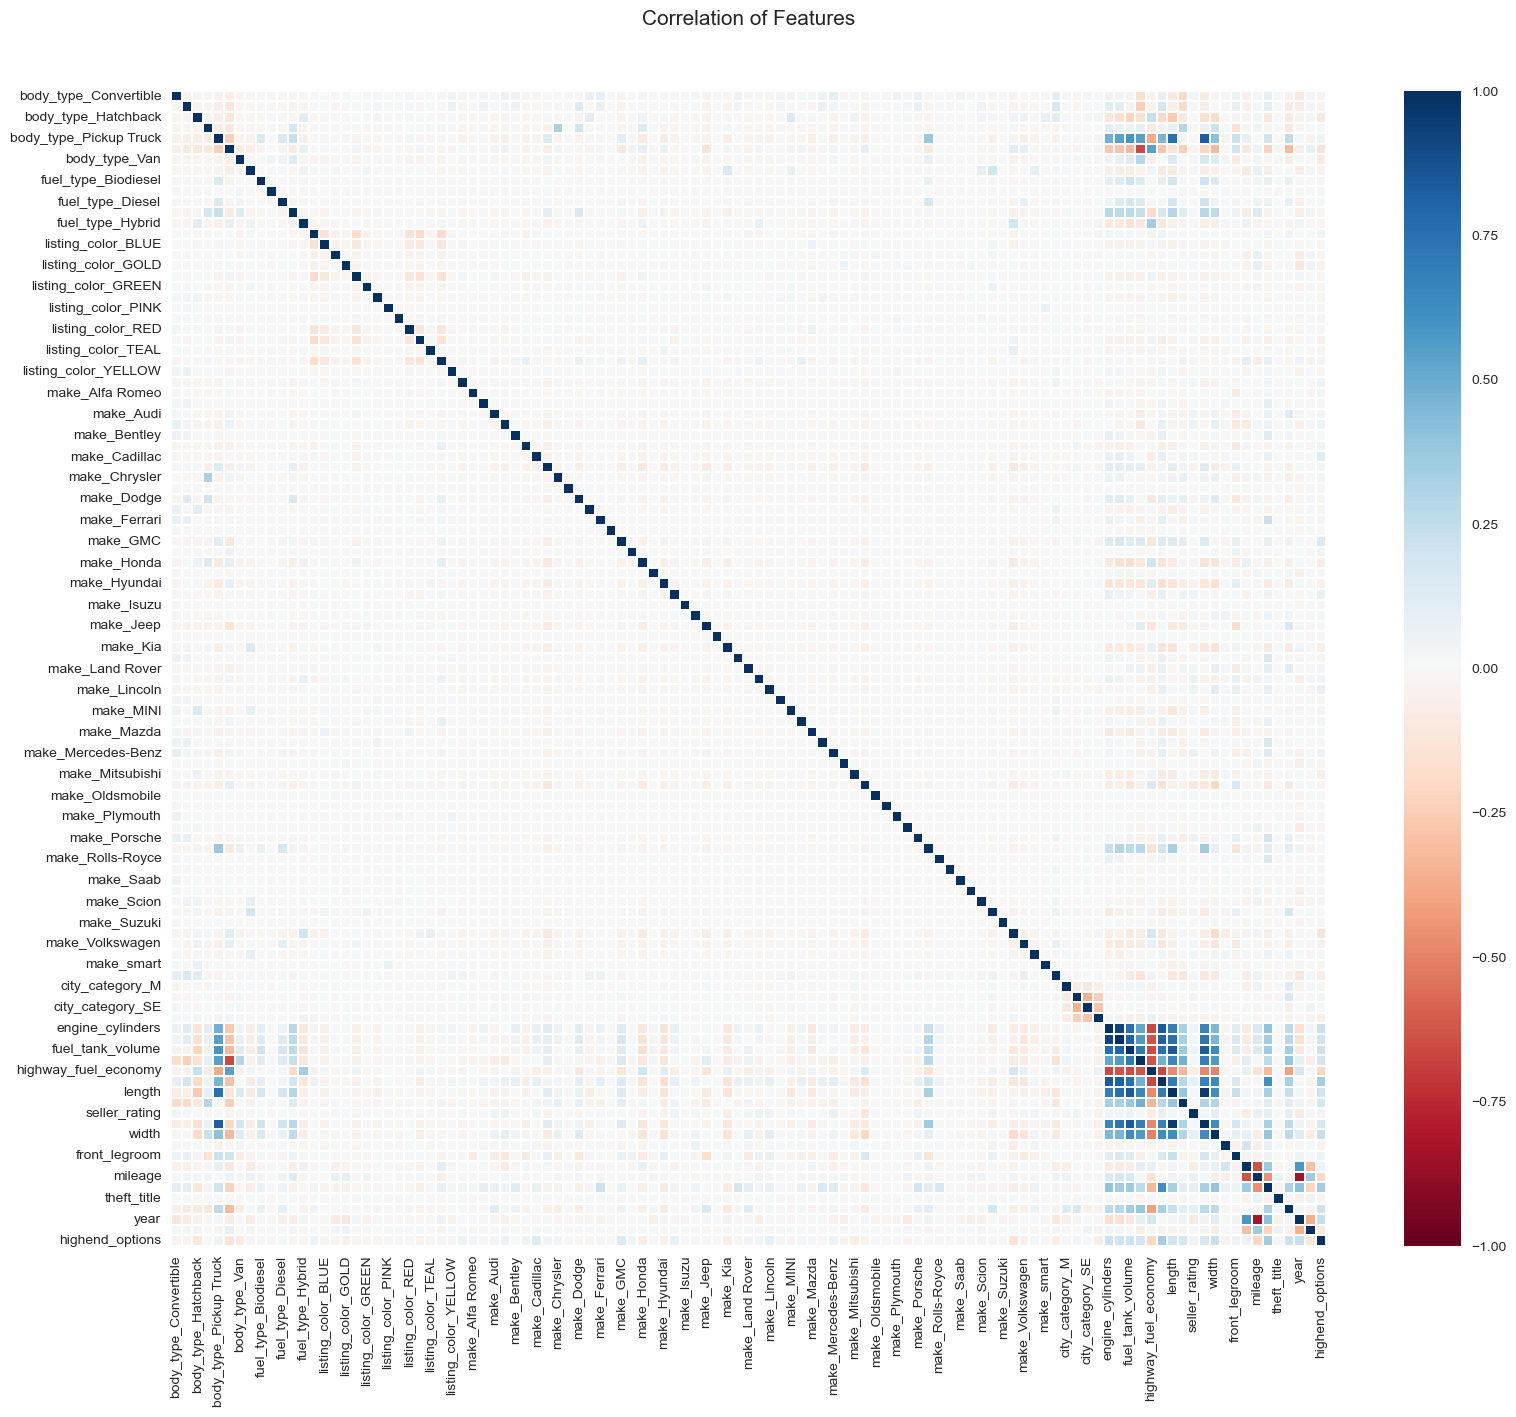

In [50]:
colormap = plt.cm.RdBu
plt.subplots(figsize=(20, 15))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(df_corrMatrix1,linewidths = 0.1, vmax= 1.0, vmin= -1.0, square=True, cmap=colormap, linecolor='white',annot=False)
# Create a Heatmap for the model 1

<Axes: xlabel='Price_Predicted1', ylabel='Residual1'>

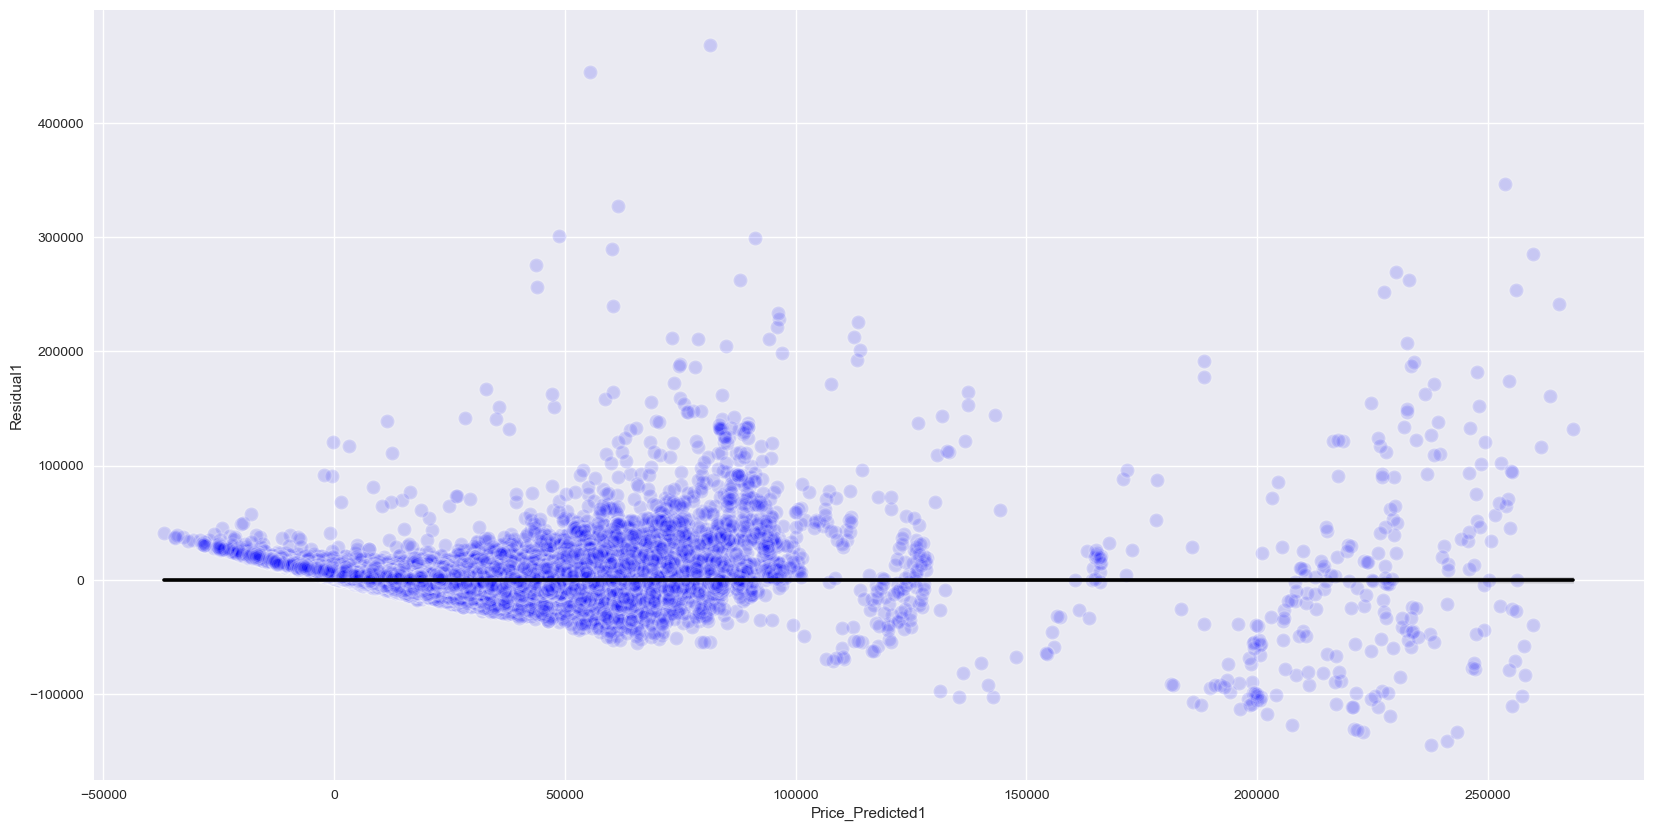

In [51]:
plt.figure(figsize=(20,10)) #changes area of scatterplot
sns.regplot(x='Price_Predicted1', y='Residual1', 
              data = df_reg1, scatter_kws={"color":"blue","alpha":0.15, "s":100,"linewidth":2,"edgecolor":"white"}, 
              line_kws={'color': 'black'})
# create a regplot for model 1

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [53]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"] = X.columns #adds a column with the labels
round(vif, 1).sort_values(by = 'VIF Factor', ascending = False)
# Create a VIF for the model 1

,VIF Factor,Features
0,1340062.5,const
98,35.5,wheelbase
95,31.4,length
92,16.1,height
90,12.3,engine_displacement
...,...,...
74,1.0,make_SRT
76,1.0,make_Saturn
77,1.0,make_Scion
79,1.0,make_Suzuki


### Model 1 Results
 - 0.771 r-squared means that this model is able to explain about 77% of the variation in sale price.
 - This model was a significant predictor of price, F(108, 186290) = 5797.0, p < .01
 - The AIC value for the model was 3.932e+06, and the BIC was 3.933e+06. Good values for these measures are close to 0.
 - There are several features with p values greater than .05 that we will need to remove in subsequent models.
 - VIF results indicated some features with high multicollinearity, which we will need to remove as well.
 - The joint plot of predicted price by residuals indicated that a linear model is appropriate for the data.
 - correlation matrix/heat map indicated some correlation between features that we may need to address in the future iterations of the model

## Section 7 - Run regression model 2

### Section 7a: Drop features wth high VIFs and high p value
 - Here we dropped all features with p values greater than 0.1 and features with VIF greater than 10.
 - In previous notebooks before this final one, we did experiment with removing 1 or 2 features at a time and the remaining features did not improve, so here we remove them all at once.

In [54]:
df_carsale = df_carsale.drop(['wheelbase','length','height', 'engine_displacement', 'body_type_Minivan',
                              'fuel_type_Compressed Natural Gas','listing_color_GRAY',
                              'listing_color_ORANGE', 'listing_color_PINK', 'listing_color_PURPLE', 
                              'listing_color_TEAL', 'make_FIAT', 'make_Fisker', 'make_Genesis', 'make_Isuzu', 'make_Saab',
                              'theft_title'], axis = 1)
df_carsale.head(2)
# drppping columns with high VIF and high p val

,body_type_Convertible,body_type_Coupe,body_type_Hatchback,body_type_Pickup Truck,body_type_Sedan,body_type_Van,body_type_Wagon,fuel_type_Biodiesel,fuel_type_Diesel,fuel_type_Flex Fuel Vehicle,...,width,daysonmarket,front_legroom,is_new,mileage,price,wheel_system_display,year,damage,highend_options
129041,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,80.3,66.0,42.4,1.0,14.0,43960.0,0.0,2020.0,0.0,6.0
391889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,90.2,92.0,42.9,0.0,30260.0,27300.0,0.0,2017.0,0.0,11.0


### Section 7b: Create regression model 2 and VIF for that model

In [55]:
df_carsale.info()
#show info for df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187847 entries, 129041 to 52208
Data columns (total 92 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   body_type_Convertible        187847 non-null  float64
 1   body_type_Coupe              187847 non-null  float64
 2   body_type_Hatchback          187847 non-null  float64
 3   body_type_Pickup Truck       187847 non-null  float64
 4   body_type_Sedan              187847 non-null  float64
 5   body_type_Van                187847 non-null  float64
 6   body_type_Wagon              187847 non-null  float64
 7   fuel_type_Biodiesel          187847 non-null  float64
 8   fuel_type_Diesel             187847 non-null  float64
 9   fuel_type_Flex Fuel Vehicle  187847 non-null  float64
 10  fuel_type_Hybrid             187847 non-null  float64
 11  listing_color_BLACK          187847 non-null  float64
 12  listing_color_BLUE           187847 non-null  float64


In [56]:
print(df_carsale.columns.tolist())
# print all columns

['body_type_Convertible', 'body_type_Coupe', 'body_type_Hatchback', 'body_type_Pickup Truck', 'body_type_Sedan', 'body_type_Van', 'body_type_Wagon', 'fuel_type_Biodiesel', 'fuel_type_Diesel', 'fuel_type_Flex Fuel Vehicle', 'fuel_type_Hybrid', 'listing_color_BLACK', 'listing_color_BLUE', 'listing_color_BROWN', 'listing_color_GOLD', 'listing_color_GREEN', 'listing_color_RED', 'listing_color_SILVER', 'listing_color_UNKNOWN', 'listing_color_YELLOW', 'make_Acura', 'make_Alfa Romeo', 'make_Aston Martin', 'make_Audi', 'make_BMW', 'make_Bentley', 'make_Buick', 'make_Cadillac', 'make_Chevrolet', 'make_Chrysler', 'make_Datsun', 'make_Dodge', 'make_Ferrari', 'make_GMC', 'make_Honda', 'make_Hummer', 'make_Hyundai', 'make_INFINITI', 'make_Jaguar', 'make_Jeep', 'make_Karma', 'make_Kia', 'make_Lamborghini', 'make_Land Rover', 'make_Lexus', 'make_Lincoln', 'make_Lotus', 'make_MINI', 'make_Maserati', 'make_Mazda', 'make_McLaren', 'make_Mercedes-Benz', 'make_Mercury', 'make_Mitsubishi', 'make_Nissan', '

In [57]:
X = df_carsale[['body_type_Convertible', 'body_type_Coupe', 'body_type_Hatchback', 
                'body_type_Pickup Truck', 'body_type_Sedan', 'body_type_Van', 'body_type_Wagon',
                'fuel_type_Biodiesel', 'fuel_type_Diesel', 'fuel_type_Flex Fuel Vehicle', 
                'fuel_type_Hybrid', 'listing_color_BLACK', 'listing_color_BLUE', 'listing_color_BROWN',
                'listing_color_GOLD', 'listing_color_GREEN', 'listing_color_RED', 'listing_color_SILVER',
                'listing_color_UNKNOWN', 'listing_color_YELLOW', 'make_Acura', 'make_Alfa Romeo',
                'make_Aston Martin', 'make_Audi', 'make_BMW', 'make_Bentley', 'make_Buick',
                'make_Cadillac', 'make_Chevrolet', 'make_Chrysler', 'make_Datsun', 'make_Dodge',
                'make_Ferrari', 'make_GMC', 'make_Honda', 'make_Hummer', 'make_Hyundai',
                'make_INFINITI', 'make_Jaguar', 'make_Jeep', 'make_Karma', 'make_Kia', 'make_Lamborghini',
                'make_Land Rover', 'make_Lexus', 'make_Lincoln', 'make_Lotus', 'make_MINI',
                'make_Maserati', 'make_Mazda', 'make_McLaren', 'make_Mercedes-Benz', 'make_Mercury', 
                'make_Mitsubishi', 'make_Nissan', 'make_Oldsmobile', 'make_Pininfarina', 'make_Plymouth',
                'make_Pontiac', 'make_Porsche', 'make_RAM', 'make_Rolls-Royce', 'make_SRT', 'make_Saturn',
                'make_Scion', 'make_Subaru', 'make_Suzuki', 'make_Toyota', 'make_Volkswagen', 
                'make_Volvo', 'make_smart', 'transmission_display_Manual', 'city_category_M',
                'city_category_MW', 'city_category_SE', 'city_category_SW', 'engine_cylinders',
                'fuel_tank_volume', 'highway_fuel_economy', 'horsepower', 'maximum_seating',
                'seller_rating', 'width', 'daysonmarket', 'front_legroom', 'is_new', 'mileage',
                 'wheel_system_display', 'year', 'damage', 'highend_options']]
y = df_carsale['price']
X = sm.add_constant(X) # adding a constant

reg2 = sm.OLS(y, X).fit()

pred2 = reg2.predict(X) 

resid2= reg2.resid
resid2

reg2.summary()
# create a new multiple regression model 2

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     6832.
Date:                Sun, 08 Oct 2023   Prob (F-statistic):               0.00
Time:                        18:14:19   Log-Likelihood:            -1.9822e+06
No. Observations:              187847   AIC:                         3.964e+06
Df Residuals:                  187755   BIC:                         3.965e+06
Df Model:                          91                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                       -1.914e+06   2.45e+04    -78.046      0.000   -1.96e+06   -1.87e+06
body_type_Convertible        5977.8818    227.407     26.287      0.000    5532.169    6423.595
body_type_Coupe               731.3226    159.324      4.590      0.000     419.051    1043.594
body_type_Hatchback          2776.6560    147.667     18.803      0.000    2487.231    3066.081
body_type_Pickup Truck      -2698.2888    103.380    -26.101      0.000   -2900.911   -2495.667
body_type_Sedan              -266.1854     74.884     -3.555      0.000    -412.956    -119.415
body_type_Van                 339.1066    209.204      1.621      0.105     -70.928     749.141
body_type_Wagon              2691.3015    202.351     13.300      0.000    2294.698    3087.905
fuel_type_Biodiesel          1.043e+04    373.309     27.946      0.000    9700.943    1.12e+04
fuel_type_Diesel             9889.9859    215.792     45.831      0.000    9467.040    1.03e+04
fuel_type_Flex Fuel Vehicle -2675.0121    113.350    -23.600      0.000   -2897.175   -2452.849
fuel_type_Hybrid             3167.7211    163.246     19.405      0.000    2847.762    3487.680
listing_color_BLACK           206.3849     60.490      3.412      0.001      87.826     324.943
listing_color_BLUE            266.0400     83.867      3.172      0.002     101.663     430.417
listing_color_BROWN          1199.6724    245.477      4.887      0.000     718.543    1680.802
listing_color_GOLD           1386.8709    339.136      4.089      0.000     722.172    2051.570
listing_color_GREEN          2456.9450    259.553      9.466      0.000    1948.228    2965.662
listing_color_RED             536.8978     84.146      6.381      0.000     371.973     701.823
listing_color_SILVER         -264.6784     68.832     -3.845      0.000    -399.588    -129.769
listing_color_UNKNOWN         871.9150     71.578     12.181      0.000     731.623    1012.207
listing_color_YELLOW         4585.6119    514.027      8.921      0.000    3578.130    5593.094
make_Acura                   4358.7528    210.207     20.736      0.000    3946.752    4770.753
make_Alfa Romeo              1989.6733    452.374      4.398      0.000    1103.031    2876.315
make_Aston Martin            1.038e+05   1474.397     70.377      0.000    1.01e+05    1.07e+05
make_Audi                    9327.6950    205.564     45.376      0.000    8924.794    9730.596
make_BMW                     8236.4857    162.790     50.596      0.000    7917.422    8555.550
make_Bentley                 6.333e+04    887.362     71.373      0.000    6.16e+04    6.51e+04
make_Buick                    868.9665    182.781      4.754      0.000     510.720    1227.213
make_Cadillac                5279.5992    193.863     27.234      0.000    4899.633    5659.565
make_Chevro

In [58]:
vif = pd.DataFrame()
pd.options.display.max_columns = None
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"] = X.columns #adds a column with the labels
round(vif, 1).sort_values(by = 'VIF Factor', ascending = False)
# Create a VIF for the model 2

,VIF Factor,Features
0,1317667.6,const
80,7.9,horsepower
77,5.9,engine_cylinders
78,5.1,fuel_tank_volume
89,4.6,year
79,4.6,highway_fuel_economy
83,4.4,width
87,4.1,mileage
4,2.5,body_type_Pickup Truck
29,2.5,make_Chevrolet


### Model 2 Results
 - In model 2, the R-squared value changed from .771 to .767, so this model is almost as good as the first one at explaining the variance in sale price.
 - Model 2 is a significant predictor of price, F(91, 186307) = 6757.0, p<.01.
 - The AIC and BIC for this model are still fairly high.
 - There is one feature remaining with a p value over 0.05, which needs to be removed in the next model, and a couple of features left with VIF greater than 5.

## Section 8 - Run regression model 3

### Section 8a: Drop features wth high VIFs and high p value
 - body_type_Van was dropped due to its p value of .118
 - engine_cylinders was dropped due to suspected multicollinearity with horsepower

In [59]:
df_carsale = df_carsale.drop(['engine_cylinders','body_type_Van'], axis = 1)
df_carsale.head(2)
# drppping columns with high VIF and high p val

,body_type_Convertible,body_type_Coupe,body_type_Hatchback,body_type_Pickup Truck,body_type_Sedan,body_type_Wagon,fuel_type_Biodiesel,fuel_type_Diesel,fuel_type_Flex Fuel Vehicle,fuel_type_Hybrid,listing_color_BLACK,listing_color_BLUE,listing_color_BROWN,listing_color_GOLD,listing_color_GREEN,listing_color_RED,listing_color_SILVER,listing_color_UNKNOWN,listing_color_YELLOW,make_Acura,make_Alfa Romeo,make_Aston Martin,make_Audi,make_BMW,make_Bentley,make_Buick,make_Cadillac,make_Chevrolet,make_Chrysler,make_Datsun,make_Dodge,make_Ferrari,make_GMC,make_Honda,make_Hummer,make_Hyundai,make_INFINITI,make_Jaguar,make_Jeep,make_Karma,make_Kia,make_Lamborghini,make_Land Rover,make_Lexus,make_Lincoln,make_Lotus,make_MINI,make_Maserati,make_Mazda,make_McLaren,make_Mercedes-Benz,make_Mercury,make_Mitsubishi,make_Nissan,make_Oldsmobile,make_Pininfarina,make_Plymouth,make_Pontiac,make_Porsche,make_RAM,make_Rolls-Royce,make_SRT,make_Saturn,make_Scion,make_Subaru,make_Suzuki,make_Toyota,make_Volkswagen,make_Volvo,make_smart,transmission_display_Manual,city_category_M,city_category_MW,city_category_SE,city_category_SW,fuel_tank_volume,highway_fuel_economy,horsepower,maximum_seating,seller_rating,width,daysonmarket,front_legroom,is_new,mileage,price,wheel_system_display,year,damage,highend_options
129041,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,17.4,32.0,237.0,5.0,4.387097,80.3,66.0,42.4,1.0,14.0,43960.0,0.0,2020.0,0.0,6.0
391889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,18.6,24.0,290.0,7.0,4.132075,90.2,92.0,42.9,0.0,30260.0,27300.0,0.0,2017.0,0.0,11.0


### Section 8b: Create regression model 3 and VIF for that model

In [60]:
df_carsale.info()
# show info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187847 entries, 129041 to 52208
Data columns (total 90 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   body_type_Convertible        187847 non-null  float64
 1   body_type_Coupe              187847 non-null  float64
 2   body_type_Hatchback          187847 non-null  float64
 3   body_type_Pickup Truck       187847 non-null  float64
 4   body_type_Sedan              187847 non-null  float64
 5   body_type_Wagon              187847 non-null  float64
 6   fuel_type_Biodiesel          187847 non-null  float64
 7   fuel_type_Diesel             187847 non-null  float64
 8   fuel_type_Flex Fuel Vehicle  187847 non-null  float64
 9   fuel_type_Hybrid             187847 non-null  float64
 10  listing_color_BLACK          187847 non-null  float64
 11  listing_color_BLUE           187847 non-null  float64
 12  listing_color_BROWN          187847 non-null  float64


In [61]:
print(df_carsale.columns.tolist())
# print all columns

['body_type_Convertible', 'body_type_Coupe', 'body_type_Hatchback', 'body_type_Pickup Truck', 'body_type_Sedan', 'body_type_Wagon', 'fuel_type_Biodiesel', 'fuel_type_Diesel', 'fuel_type_Flex Fuel Vehicle', 'fuel_type_Hybrid', 'listing_color_BLACK', 'listing_color_BLUE', 'listing_color_BROWN', 'listing_color_GOLD', 'listing_color_GREEN', 'listing_color_RED', 'listing_color_SILVER', 'listing_color_UNKNOWN', 'listing_color_YELLOW', 'make_Acura', 'make_Alfa Romeo', 'make_Aston Martin', 'make_Audi', 'make_BMW', 'make_Bentley', 'make_Buick', 'make_Cadillac', 'make_Chevrolet', 'make_Chrysler', 'make_Datsun', 'make_Dodge', 'make_Ferrari', 'make_GMC', 'make_Honda', 'make_Hummer', 'make_Hyundai', 'make_INFINITI', 'make_Jaguar', 'make_Jeep', 'make_Karma', 'make_Kia', 'make_Lamborghini', 'make_Land Rover', 'make_Lexus', 'make_Lincoln', 'make_Lotus', 'make_MINI', 'make_Maserati', 'make_Mazda', 'make_McLaren', 'make_Mercedes-Benz', 'make_Mercury', 'make_Mitsubishi', 'make_Nissan', 'make_Oldsmobile',

In [62]:
X = df_carsale[['body_type_Convertible', 'body_type_Coupe', 'body_type_Hatchback', 
                'body_type_Pickup Truck', 'body_type_Sedan', 'body_type_Wagon',
                'fuel_type_Biodiesel', 'fuel_type_Diesel', 'fuel_type_Flex Fuel Vehicle', 
                'fuel_type_Hybrid', 'listing_color_BLACK', 'listing_color_BLUE', 'listing_color_BROWN',
                'listing_color_GOLD', 'listing_color_GREEN', 'listing_color_RED', 'listing_color_SILVER',
                'listing_color_UNKNOWN', 'listing_color_YELLOW', 'make_Acura', 'make_Alfa Romeo',
                'make_Aston Martin', 'make_Audi', 'make_BMW', 'make_Bentley', 'make_Buick',
                'make_Cadillac', 'make_Chevrolet', 'make_Chrysler', 'make_Datsun', 'make_Dodge', 
                'make_Ferrari', 'make_GMC', 'make_Honda', 'make_Hummer', 'make_Hyundai',
                'make_INFINITI', 'make_Jaguar', 'make_Jeep', 'make_Karma', 'make_Kia',
                'make_Lamborghini', 'make_Land Rover', 'make_Lexus', 'make_Lincoln', 
                'make_Lotus', 'make_MINI', 'make_Maserati', 'make_Mazda', 'make_McLaren', 
                'make_Mercedes-Benz', 'make_Mercury', 'make_Mitsubishi', 'make_Nissan', 
                'make_Oldsmobile', 'make_Pininfarina', 'make_Plymouth', 'make_Pontiac',
                'make_Porsche', 'make_RAM', 'make_Rolls-Royce', 'make_SRT', 'make_Saturn',
                'make_Scion', 'make_Subaru', 'make_Suzuki', 'make_Toyota', 'make_Volkswagen', 
                'make_Volvo', 'make_smart', 'transmission_display_Manual', 'city_category_M', 
                'city_category_MW', 'city_category_SE', 'city_category_SW', 'fuel_tank_volume',
                'highway_fuel_economy', 'horsepower', 'maximum_seating', 'seller_rating', 'width',
                'daysonmarket', 'front_legroom', 'is_new', 'mileage', 'wheel_system_display',
                'year', 'damage', 'highend_options']]
y = df_carsale['price']
X = sm.add_constant(X) # adding a constant

reg3 = sm.OLS(y, X).fit()

pred3 = reg3.predict(X) 

resid3= reg3.resid
resid3

reg3.summary()
# create a new multiple regression model 3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     6955.
Date:                Sun, 08 Oct 2023   Prob (F-statistic):               0.00
Time:                        18:16:17   Log-Likelihood:            -1.9825e+06
No. Observations:              187847   AIC:                         3.965e+06
Df Residuals:                  187757   BIC:                         3.966e+06
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                       -2.021e+06   2.42e+04    -83.688      0.000   -2.07e+06   -1.97e+06
body_type_Convertible        5706.1596    227.510     25.081      0.000    5260.246    6152.073
body_type_Coupe               556.6769    159.438      3.491      0.000     244.182     869.172
body_type_Hatchback          2270.1670    146.527     15.493      0.000    1982.977    2557.357
body_type_Pickup Truck      -3007.5133    100.396    -29.957      0.000   -3204.287   -2810.740
body_type_Sedan              -463.5555     74.569     -6.216      0.000    -609.709    -317.402
body_type_Wagon              2599.2057    202.652     12.826      0.000    2202.013    2996.398
fuel_type_Biodiesel          9997.2367    373.132     26.793      0.000    9265.906    1.07e+04
fuel_type_Diesel             9861.7028    216.131     45.628      0.000    9438.092    1.03e+04
fuel_type_Flex Fuel Vehicle -3223.6898    111.191    -28.992      0.000   -3441.622   -3005.758
fuel_type_Hybrid             2865.4339    163.042     17.575      0.000    2545.875    3184.993
listing_color_BLACK           192.8578     60.450      3.190      0.001      74.378     311.338
listing_color_BLUE            283.0641     83.927      3.373      0.001     118.570     447.558
listing_color_BROWN          1183.1117    245.817      4.813      0.000     701.316    1664.908
listing_color_GOLD           1454.0178    339.620      4.281      0.000     788.371    2119.664
listing_color_GREEN          2443.2915    259.962      9.399      0.000    1933.772    2952.811
listing_color_RED             558.0560     84.184      6.629      0.000     393.057     723.055
listing_color_SILVER         -255.1502     68.808     -3.708      0.000    -390.013    -120.288
listing_color_UNKNOWN         859.4343     71.627     11.999      0.000     719.047     999.822
listing_color_YELLOW         4509.3386    514.879      8.758      0.000    3500.189    5518.488
make_Acura                   4215.4136    210.466     20.029      0.000    3802.904    4627.923
make_Alfa Romeo              2878.6363    451.737      6.372      0.000    1993.243    3764.029
make_Aston Martin            1.021e+05   1475.335     69.202      0.000    9.92e+04    1.05e+05
make_Audi                    9441.5420    205.752     45.888      0.000    9038.274    9844.810
make_BMW                     8201.6888    162.905     50.346      0.000    7882.398    8520.979
make_Bentley                 6.204e+04    887.332     69.921      0.000    6.03e+04    6.38e+04
make_Buick                    681.1696    182.807      3.726      0.000     322.873    1039.467
make_Cadillac                5192.0156    194.118     26.747      0.000    4811.549    5572.482
make_Chevrolet                 24.9599    100.571      0.248      0.804    -172.157     222.076
make_Chrysl

In [63]:
vif = pd.DataFrame()
pd.options.display.max_columns = None
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"] = X.columns #adds a column with the labels
round(vif, 1).sort_values(by = 'VIF Factor', ascending = False)
# Create a VIF for the model 3

,VIF Factor,Features
0,1274378.9,const
78,5.0,horsepower
76,4.8,fuel_tank_volume
77,4.4,highway_fuel_economy
87,4.4,year
81,4.2,width
85,4.1,mileage
5,2.5,body_type_Sedan
28,2.5,make_Chevrolet
4,2.4,body_type_Pickup Truck


### Model 3 Results
 - The model remains significant after the removal of the two features, and the R-squared remains unchanged at .767.
 - Now that we have removed the one feature with a p value greater than .05, there is now another feature with a high p value that needs to be removed (make_Chevrolet).
 - We have no more features with high VIF values, so we believe we have addressed any multicollinearity that may have been present in the features.

## Section 9 - Run regression model 4 (FINAL MODEL)

### Section 9a: Drop features wth high VIFs and high p value
 - Dropping 'make_Chevrolet' due to its p value of 0.775

In [64]:
df_carsale = df_carsale.drop(['make_Chevrolet'], axis = 1)
df_carsale.head(2)
# drppping column with high VIF and high p val

,body_type_Convertible,body_type_Coupe,body_type_Hatchback,body_type_Pickup Truck,body_type_Sedan,body_type_Wagon,fuel_type_Biodiesel,fuel_type_Diesel,fuel_type_Flex Fuel Vehicle,fuel_type_Hybrid,listing_color_BLACK,listing_color_BLUE,listing_color_BROWN,listing_color_GOLD,listing_color_GREEN,listing_color_RED,listing_color_SILVER,listing_color_UNKNOWN,listing_color_YELLOW,make_Acura,make_Alfa Romeo,make_Aston Martin,make_Audi,make_BMW,make_Bentley,make_Buick,make_Cadillac,make_Chrysler,make_Datsun,make_Dodge,make_Ferrari,make_GMC,make_Honda,make_Hummer,make_Hyundai,make_INFINITI,make_Jaguar,make_Jeep,make_Karma,make_Kia,make_Lamborghini,make_Land Rover,make_Lexus,make_Lincoln,make_Lotus,make_MINI,make_Maserati,make_Mazda,make_McLaren,make_Mercedes-Benz,make_Mercury,make_Mitsubishi,make_Nissan,make_Oldsmobile,make_Pininfarina,make_Plymouth,make_Pontiac,make_Porsche,make_RAM,make_Rolls-Royce,make_SRT,make_Saturn,make_Scion,make_Subaru,make_Suzuki,make_Toyota,make_Volkswagen,make_Volvo,make_smart,transmission_display_Manual,city_category_M,city_category_MW,city_category_SE,city_category_SW,fuel_tank_volume,highway_fuel_economy,horsepower,maximum_seating,seller_rating,width,daysonmarket,front_legroom,is_new,mileage,price,wheel_system_display,year,damage,highend_options
129041,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,17.4,32.0,237.0,5.0,4.387097,80.3,66.0,42.4,1.0,14.0,43960.0,0.0,2020.0,0.0,6.0
391889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,18.6,24.0,290.0,7.0,4.132075,90.2,92.0,42.9,0.0,30260.0,27300.0,0.0,2017.0,0.0,11.0


In [65]:
X = df_carsale[['body_type_Convertible', 'body_type_Coupe', 'body_type_Hatchback', 
                'body_type_Pickup Truck', 'body_type_Sedan', 'body_type_Wagon',
                'fuel_type_Biodiesel', 'fuel_type_Diesel', 'fuel_type_Flex Fuel Vehicle', 
                'fuel_type_Hybrid', 'listing_color_BLACK', 'listing_color_BLUE', 'listing_color_BROWN',
                'listing_color_GOLD', 'listing_color_GREEN', 'listing_color_RED', 'listing_color_SILVER',
                'listing_color_UNKNOWN', 'listing_color_YELLOW', 'make_Acura', 'make_Alfa Romeo',
                'make_Aston Martin', 'make_Audi', 'make_BMW', 'make_Bentley', 'make_Buick',
                'make_Cadillac', 'make_Chrysler', 'make_Datsun', 'make_Dodge', 
                'make_Ferrari', 'make_GMC', 'make_Honda', 'make_Hummer', 'make_Hyundai',
                'make_INFINITI', 'make_Jaguar', 'make_Jeep', 'make_Karma', 'make_Kia',
                'make_Lamborghini', 'make_Land Rover', 'make_Lexus', 'make_Lincoln', 
                'make_Lotus', 'make_MINI', 'make_Maserati', 'make_Mazda', 'make_McLaren', 
                'make_Mercedes-Benz', 'make_Mercury', 'make_Mitsubishi', 'make_Nissan', 
                'make_Oldsmobile', 'make_Pininfarina', 'make_Plymouth', 'make_Pontiac',
                'make_Porsche', 'make_RAM', 'make_Rolls-Royce', 'make_SRT', 'make_Saturn',
                'make_Scion', 'make_Subaru', 'make_Suzuki', 'make_Toyota', 'make_Volkswagen', 
                'make_Volvo', 'make_smart', 'transmission_display_Manual', 'city_category_M', 
                'city_category_MW', 'city_category_SE', 'city_category_SW', 'fuel_tank_volume',
                'highway_fuel_economy', 'horsepower', 'maximum_seating', 'seller_rating', 'width',
                'daysonmarket', 'front_legroom', 'is_new', 'mileage', 'wheel_system_display',
                'year', 'damage', 'highend_options']]
y = df_carsale['price']
X = sm.add_constant(X) # adding a constant

reg4 = sm.OLS(y, X).fit()

pred4 = reg4.predict(X) 

resid4= reg4.resid
resid4

reg4.summary()
# create a new multiple regression model 4

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     7034.
Date:                Sun, 08 Oct 2023   Prob (F-statistic):               0.00
Time:                        18:18:09   Log-Likelihood:            -1.9825e+06
No. Observations:              187847   AIC:                         3.965e+06
Df Residuals:                  187758   BIC:                         3.966e+06
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                       -2.022e+06   2.41e+04    -83.955      0.000   -2.07e+06   -1.97e+06
body_type_Convertible        5704.4631    227.406     25.085      0.000    5258.752    6150.174
body_type_Coupe               556.2429    159.428      3.489      0.000     243.767     868.719
body_type_Hatchback          2267.8864    146.239     15.508      0.000    1981.262    2554.511
body_type_Pickup Truck      -3005.7359    100.140    -30.015      0.000   -3202.008   -2809.464
body_type_Sedan              -465.0246     74.334     -6.256      0.000    -610.717    -319.332
body_type_Wagon              2598.0173    202.595     12.824      0.000    2200.937    2995.098
fuel_type_Biodiesel          9996.3100    373.113     26.792      0.000    9265.017    1.07e+04
fuel_type_Diesel             9862.3562    216.114     45.635      0.000    9438.778    1.03e+04
fuel_type_Flex Fuel Vehicle -3222.2299    111.035    -29.020      0.000   -3439.856   -3004.604
fuel_type_Hybrid             2864.4649    162.995     17.574      0.000    2544.999    3183.931
listing_color_BLACK           192.9419     60.448      3.192      0.001      74.464     311.420
listing_color_BLUE            283.0436     83.926      3.373      0.001     118.550     447.537
listing_color_BROWN          1183.4635    245.812      4.814      0.000     701.677    1665.250
listing_color_GOLD           1453.8418    339.618      4.281      0.000     788.198    2119.485
listing_color_GREEN          2442.6243    259.947      9.397      0.000    1933.134    2952.115
listing_color_RED             557.8399     84.179      6.627      0.000     392.850     722.829
listing_color_SILVER         -255.0423     68.807     -3.707      0.000    -389.902    -120.183
listing_color_UNKNOWN         859.6328     71.622     12.002      0.000     719.255    1000.011
listing_color_YELLOW         4510.5595    514.854      8.761      0.000    3501.458    5519.661
make_Acura                   4199.6277    200.624     20.933      0.000    3806.409    4592.847
make_Alfa Romeo              2865.1093    448.435      6.389      0.000    1986.187    3744.032
make_Aston Martin            1.021e+05   1474.859     69.218      0.000    9.92e+04    1.05e+05
make_Audi                    9432.3248    202.372     46.609      0.000    9035.681    9828.968
make_BMW                     8192.8380    158.953     51.542      0.000    7881.293    8504.383
make_Bentley                 6.204e+04    886.806     69.954      0.000    6.03e+04    6.38e+04
make_Buick                    665.9223    172.174      3.868      0.000     328.466    1003.379
make_Cadillac                5176.3962    183.632     28.189      0.000    4816.482    5536.311
make_Chrysler               -2730.9129    202.025    -13.518      0.000   -3126.878   -2334.948
make_Datsun

In [66]:
df_reg4 = df_carsale[['body_type_Convertible', 'body_type_Coupe', 'body_type_Hatchback', 
                'body_type_Pickup Truck', 'body_type_Sedan', 'body_type_Wagon',
                'fuel_type_Biodiesel', 'fuel_type_Diesel', 'fuel_type_Flex Fuel Vehicle', 
                'fuel_type_Hybrid', 'listing_color_BLACK', 'listing_color_BLUE', 'listing_color_BROWN',
                'listing_color_GOLD', 'listing_color_GREEN', 'listing_color_RED', 'listing_color_SILVER',
                'listing_color_UNKNOWN', 'listing_color_YELLOW', 'make_Acura', 'make_Alfa Romeo',
                'make_Aston Martin', 'make_Audi', 'make_BMW', 'make_Bentley', 'make_Buick',
                'make_Cadillac', 'make_Chrysler', 'make_Datsun', 'make_Dodge', 
                'make_Ferrari', 'make_GMC', 'make_Honda', 'make_Hummer', 'make_Hyundai',
                'make_INFINITI', 'make_Jaguar', 'make_Jeep', 'make_Karma', 'make_Kia',
                'make_Lamborghini', 'make_Land Rover', 'make_Lexus', 'make_Lincoln', 
                'make_Lotus', 'make_MINI', 'make_Maserati', 'make_Mazda', 'make_McLaren', 
                'make_Mercedes-Benz', 'make_Mercury', 'make_Mitsubishi', 'make_Nissan', 
                'make_Oldsmobile', 'make_Pininfarina', 'make_Plymouth', 'make_Pontiac',
                'make_Porsche', 'make_RAM', 'make_Rolls-Royce', 'make_SRT', 'make_Saturn',
                'make_Scion', 'make_Subaru', 'make_Suzuki', 'make_Toyota', 'make_Volkswagen', 
                'make_Volvo', 'make_smart', 'transmission_display_Manual', 'city_category_M', 
                'city_category_MW', 'city_category_SE', 'city_category_SW', 'fuel_tank_volume',
                'highway_fuel_economy', 'horsepower', 'maximum_seating', 'seller_rating', 'width',
                'daysonmarket', 'front_legroom', 'is_new', 'mileage',  'price','wheel_system_display',
                'year', 'damage', 'highend_options']]
df_reg4
df_reg4 = pd.concat([df_reg4, pred4, resid4], axis=1)
df_reg4 = df_reg4.rename(columns = {0:'Price_Predicted4'})
df_reg4 = df_reg4.rename(columns = {1:'Residual4'})
df_reg4.head(10)
# create a regression table 4 to include columns and rename 0 and 1 titles

,body_type_Convertible,body_type_Coupe,body_type_Hatchback,body_type_Pickup Truck,body_type_Sedan,body_type_Wagon,fuel_type_Biodiesel,fuel_type_Diesel,fuel_type_Flex Fuel Vehicle,fuel_type_Hybrid,listing_color_BLACK,listing_color_BLUE,listing_color_BROWN,listing_color_GOLD,listing_color_GREEN,listing_color_RED,listing_color_SILVER,listing_color_UNKNOWN,listing_color_YELLOW,make_Acura,make_Alfa Romeo,make_Aston Martin,make_Audi,make_BMW,make_Bentley,make_Buick,make_Cadillac,make_Chrysler,make_Datsun,make_Dodge,make_Ferrari,make_GMC,make_Honda,make_Hummer,make_Hyundai,make_INFINITI,make_Jaguar,make_Jeep,make_Karma,make_Kia,make_Lamborghini,make_Land Rover,make_Lexus,make_Lincoln,make_Lotus,make_MINI,make_Maserati,make_Mazda,make_McLaren,make_Mercedes-Benz,make_Mercury,make_Mitsubishi,make_Nissan,make_Oldsmobile,make_Pininfarina,make_Plymouth,make_Pontiac,make_Porsche,make_RAM,make_Rolls-Royce,make_SRT,make_Saturn,make_Scion,make_Subaru,make_Suzuki,make_Toyota,make_Volkswagen,make_Volvo,make_smart,transmission_display_Manual,city_category_M,city_category_MW,city_category_SE,city_category_SW,fuel_tank_volume,highway_fuel_economy,horsepower,maximum_seating,seller_rating,width,daysonmarket,front_legroom,is_new,mileage,price,wheel_system_display,year,damage,highend_options,Price_Predicted4,Residual4
129041,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,17.4,32.0,237.0,5.0,4.387097,80.3,66.0,42.4,1.0,14.0,43960.0,0.0,2020.0,0.0,6.0,38686.781444,5273.218556
391889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,18.6,24.0,290.0,7.0,4.132075,90.2,92.0,42.9,0.0,30260.0,27300.0,0.0,2017.0,0.0,11.0,28382.306214,-1082.306214
240480,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.0,38.0,98.0,4.0,3.764706,62.8,9.0,41.7,1.0,2.0,15495.0,0.0,2021.0,0.0,4.0,18709.054166,-3214.054166
26718,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,26.0,375.0,6.0,4.490566,96.8,41.0,43.9,1.0,12.0,33720.0,0.0,2020.0,0.0,5.0,45113.783668,-11393.783668
79556,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,26.0,23.0,375.0,6.0,4.578947,96.8,26.0,43.9,1.0,7.0,45775.0,1.0,2020.0,0.0,11.0,49480.041258,-3705.041258
194983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,19.4,27.0,310.0,8.0,3.745455,78.6,19.0,41.0,1.0,0.0,36705.0,0.0,2020.0,0.0,9.0,41119.427069,-4414.427069
287570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

/var/folders/17/zsnqyy7x4jv5xx6j7nvhd_l40000gn/T/ipykernel_81247/2050844596.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Text(65.34722222222221, 0.5, 'Residual')

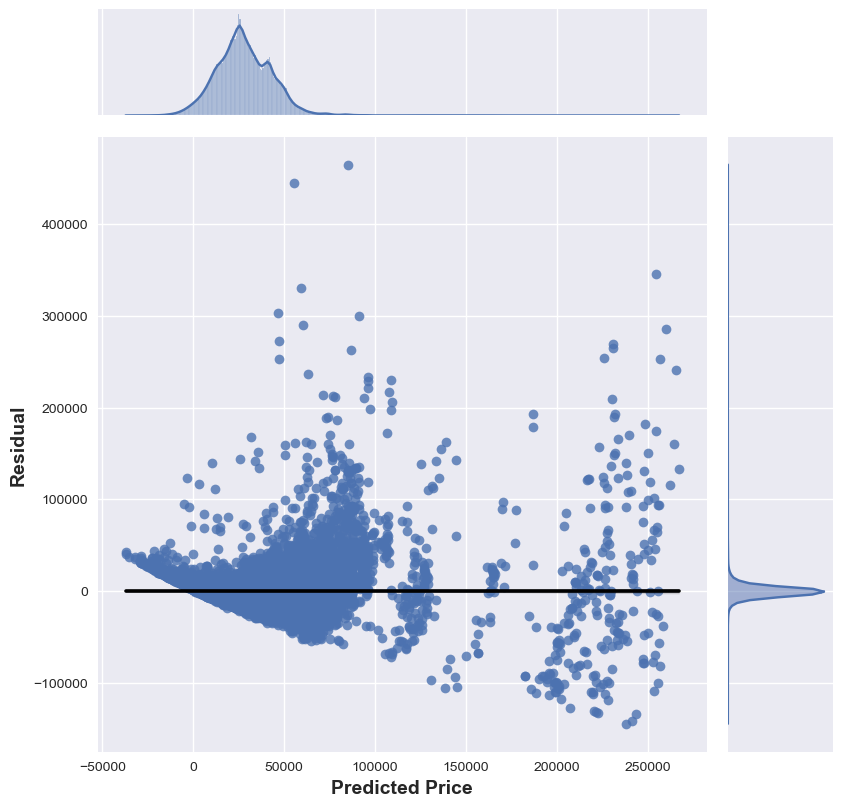

In [67]:
plt.style.use('seaborn')
sns.jointplot(x=pred4, y=resid4, kind = "reg", data = df_reg4, ratio=5, height = 8, 
              line_kws={'color': 'black'})
plt.xlabel("Predicted Price", fontweight='bold', fontsize='14', horizontalalignment='center')
plt.ylabel("Residual", fontweight='bold', fontsize='14', horizontalalignment='center')
# create a jointplot for Predicted Price and Residual

In [68]:
df_feature4 = df_carsale[['body_type_Convertible', 'body_type_Coupe', 'body_type_Hatchback', 
                'body_type_Pickup Truck', 'body_type_Sedan', 'body_type_Wagon',
                'fuel_type_Biodiesel', 'fuel_type_Diesel', 'fuel_type_Flex Fuel Vehicle', 
                'fuel_type_Hybrid', 'listing_color_BLACK', 'listing_color_BLUE', 'listing_color_BROWN',
                'listing_color_GOLD', 'listing_color_GREEN', 'listing_color_RED', 'listing_color_SILVER',
                'listing_color_UNKNOWN', 'listing_color_YELLOW', 'make_Acura', 'make_Alfa Romeo',
                'make_Aston Martin', 'make_Audi', 'make_BMW', 'make_Bentley', 'make_Buick',
                'make_Cadillac', 'make_Chrysler', 'make_Datsun', 'make_Dodge', 
                'make_Ferrari', 'make_GMC', 'make_Honda', 'make_Hummer', 'make_Hyundai',
                'make_INFINITI', 'make_Jaguar', 'make_Jeep', 'make_Karma', 'make_Kia',
                'make_Lamborghini', 'make_Land Rover', 'make_Lexus', 'make_Lincoln', 
                'make_Lotus', 'make_MINI', 'make_Maserati', 'make_Mazda', 'make_McLaren', 
                'make_Mercedes-Benz', 'make_Mercury', 'make_Mitsubishi', 'make_Nissan', 
                'make_Oldsmobile', 'make_Pininfarina', 'make_Plymouth', 'make_Pontiac',
                'make_Porsche', 'make_RAM', 'make_Rolls-Royce', 'make_SRT', 'make_Saturn',
                'make_Scion', 'make_Subaru', 'make_Suzuki', 'make_Toyota', 'make_Volkswagen', 
                'make_Volvo', 'make_smart', 'transmission_display_Manual', 'city_category_M', 
                'city_category_MW', 'city_category_SE', 'city_category_SW', 'fuel_tank_volume',
                'highway_fuel_economy', 'horsepower', 'maximum_seating', 'seller_rating', 'width',
                'daysonmarket', 'front_legroom', 'is_new', 'mileage',  'price','wheel_system_display',
                'year', 'damage', 'highend_options']]
df_feature4.info()
# created new dataframe with all X features and without const

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187847 entries, 129041 to 52208
Data columns (total 89 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   body_type_Convertible        187847 non-null  float64
 1   body_type_Coupe              187847 non-null  float64
 2   body_type_Hatchback          187847 non-null  float64
 3   body_type_Pickup Truck       187847 non-null  float64
 4   body_type_Sedan              187847 non-null  float64
 5   body_type_Wagon              187847 non-null  float64
 6   fuel_type_Biodiesel          187847 non-null  float64
 7   fuel_type_Diesel             187847 non-null  float64
 8   fuel_type_Flex Fuel Vehicle  187847 non-null  float64
 9   fuel_type_Hybrid             187847 non-null  float64
 10  listing_color_BLACK          187847 non-null  float64
 11  listing_color_BLUE           187847 non-null  float64
 12  listing_color_BROWN          187847 non-null  float64


In [69]:
pd.set_option('display.max_rows', 100)
X_corr = X.drop(['const'], axis=1)
corrMatrix4 = df_feature4.corr()
df_corrMatrix4 = pd.DataFrame(corrMatrix4)
df_corrMatrix4
# Create correlation Matrix 4

,body_type_Convertible,body_type_Coupe,body_type_Hatchback,body_type_Pickup Truck,body_type_Sedan,body_type_Wagon,fuel_type_Biodiesel,fuel_type_Diesel,fuel_type_Flex Fuel Vehicle,fuel_type_Hybrid,listing_color_BLACK,listing_color_BLUE,listing_color_BROWN,listing_color_GOLD,listing_color_GREEN,listing_color_RED,listing_color_SILVER,listing_color_UNKNOWN,listing_color_YELLOW,make_Acura,make_Alfa Romeo,make_Aston Martin,make_Audi,make_BMW,make_Bentley,make_Buick,make_Cadillac,make_Chrysler,make_Datsun,make_Dodge,make_Ferrari,make_GMC,make_Honda,make_Hummer,make_Hyundai,make_INFINITI,make_Jaguar,make_Jeep,make_Karma,make_Kia,make_Lamborghini,make_Land Rover,make_Lexus,make_Lincoln,make_Lotus,make_MINI,make_Maserati,make_Mazda,make_McLaren,make_Mercedes-Benz,make_Mercury,make_Mitsubishi,make_Nissan,make_Oldsmobile,make_Pininfarina,make_Plymouth,make_Pontiac,make_Porsche,make_RAM,make_Rolls-Royce,make_SRT,make_Saturn,make_Scion,make_Subaru,make_Suzuki,make_Toyota,make_Volkswagen,make_Volvo,make_smart,transmission_display_Manual,city_category_M,city_category_MW,city_category_SE,city_category_SW,fuel_tank_volume,highway_fuel_economy,horsepower,maximum_seating,seller_rating,width,daysonmarket,front_legroom,is_new,mileage,price,wheel_system_display,year,damage,highend_options
body_type_Convertible,1.000000,-0.018650,-0.018791,-0.040585,-0.067742,-0.012342,-0.006582,-0.011700,-0.021436,-0.016764,0.002981,0.001105,-0.003372,0.004815,0.001724,0.018629,-0.004065,-0.015750,0.046663,-0.012111,-0.003218,0.029225,0.020556,0.063034,0.058448,-0.009065,-0.011489,0.005220,-0.000249,-0.018795,0.083267,-0.018440,-0.029390,-0.001991,-0.022603,-0.009540,0.021193,-0.023649,-0.000431,-0.021298,0.057633,-0.008608,-0.005488,-0.011504,0.027989,0.045837,0.007251,0.030526,0.049746,0.099381,-0.002477,-0.006686,-0.027264,-0.000704,0.021393,0.048420,0.020557,0.071784,-0.016729,0.015537,-0.000431,0.016365,-0.003129,-0.014478,-0.001293,-0.028434,-0.005300,-0.002010,0.020478,0.095534,-0.008081,-0.019770,0.022211,0.010357,-0.035215,-0.034227,0.087789,-0.201567,0.031416,-0.022841,0.009613,0.052268,-0.053113,0.020061,0.100907,-0.053435,-0.111421,0.023403,-0.028224
body_type_Coupe,-0.018650,1.000000,-0.030128,-0.065071,-0.108611,-0.019788,-0.010553,-0.018759,-0.037921,-0.026251,0.010197,0.006184,-0.012869,-0.007114,0.017805,0.020685,-0.020606,0.008638,0.069845,-0.018559,-0.006493,0.058320,0.014680,0.034947,0.039723,-0.022114,-0.008299,-0.018117,-0.000399,0.137017,0.071433,-0.029565,0.011789,-0.003192,-0.006232,0.016731,0.013287,-0.037916,-0.000691,-0.029976,0.046828,-0.013801,0.004390,-0.018444,0.031562,-0.006236,0.006937,-0.025276,0.062583,0.032735,-0.003971,-0.007691,-0.038977,0.003730,-0.000399,-0.001056,0.026417,0.071958,-0.026821,0.014860,0.023110,0.000746,0.050761,-0.016480,-0.002073,-0.044120,-0.031049,-0.016173,-0.002361,0.171191,-0.003127,-0.019457,0.009209,0.008885,-0.037190,-0.034439,0.187679,-0.196245,0.022585,0.001216,-0.010005,0.074498,-0.053982,0.019062,0.105467,-0.082128,-0.091195,0.026493,-0.026304
body_type_Hatchback,-0.018791,-0.030128,1.000000,-0.065561,-0.109429,-0.019937,-0.010632,-0.010679,-0.015073,0.110250,-0.014484,0.021201,-0.006226,-0.005254,0.012937,0.017597,0.006313,-0.011017,0.009945,-0.019563,-0.008509,-0.002543,-0.019854,-0.026354,-0.004274,-0.023255,-0.021828,-0.019415,0.013243,-0.026377,0.001583,-0.029787,0.059921,-0.003216,0.018062,-0.021408,-0.010678,-0.038202,-0.000696,-0.021152,-0.002785,-0.013905,-0.021055,-0.018583,-0.001504,0.147866,-0.007375,0.025905,-0.002871,-0.026238,-0.004001,0.048861,-0.032925,-0.001137,-0.000402,-0.001064,0.028618,-0.012297,-0.027023,-0.002543,-0.000696,0.002158,0.039471,0.024364,-0.002089,0.044116,0.051068,-0.013239,0.064514,0.113588,-0.001191,-0.004041,-0.008607,0.025973,-0.223455,0.227826,-0.198427,-0.097982,0.007681,-0.190168,0.007540,-0.030942,-0.027922,0.028984,-0.114405,-0.101164,-0.040080,0.028613,-0.103887
body_type_Pickup Truck,-0.040585,-0.065071,-0.065561,1.000000,-0.236349,-0.043061,0.161380

<Axes: title={'center': 'Correlation of Features'}>

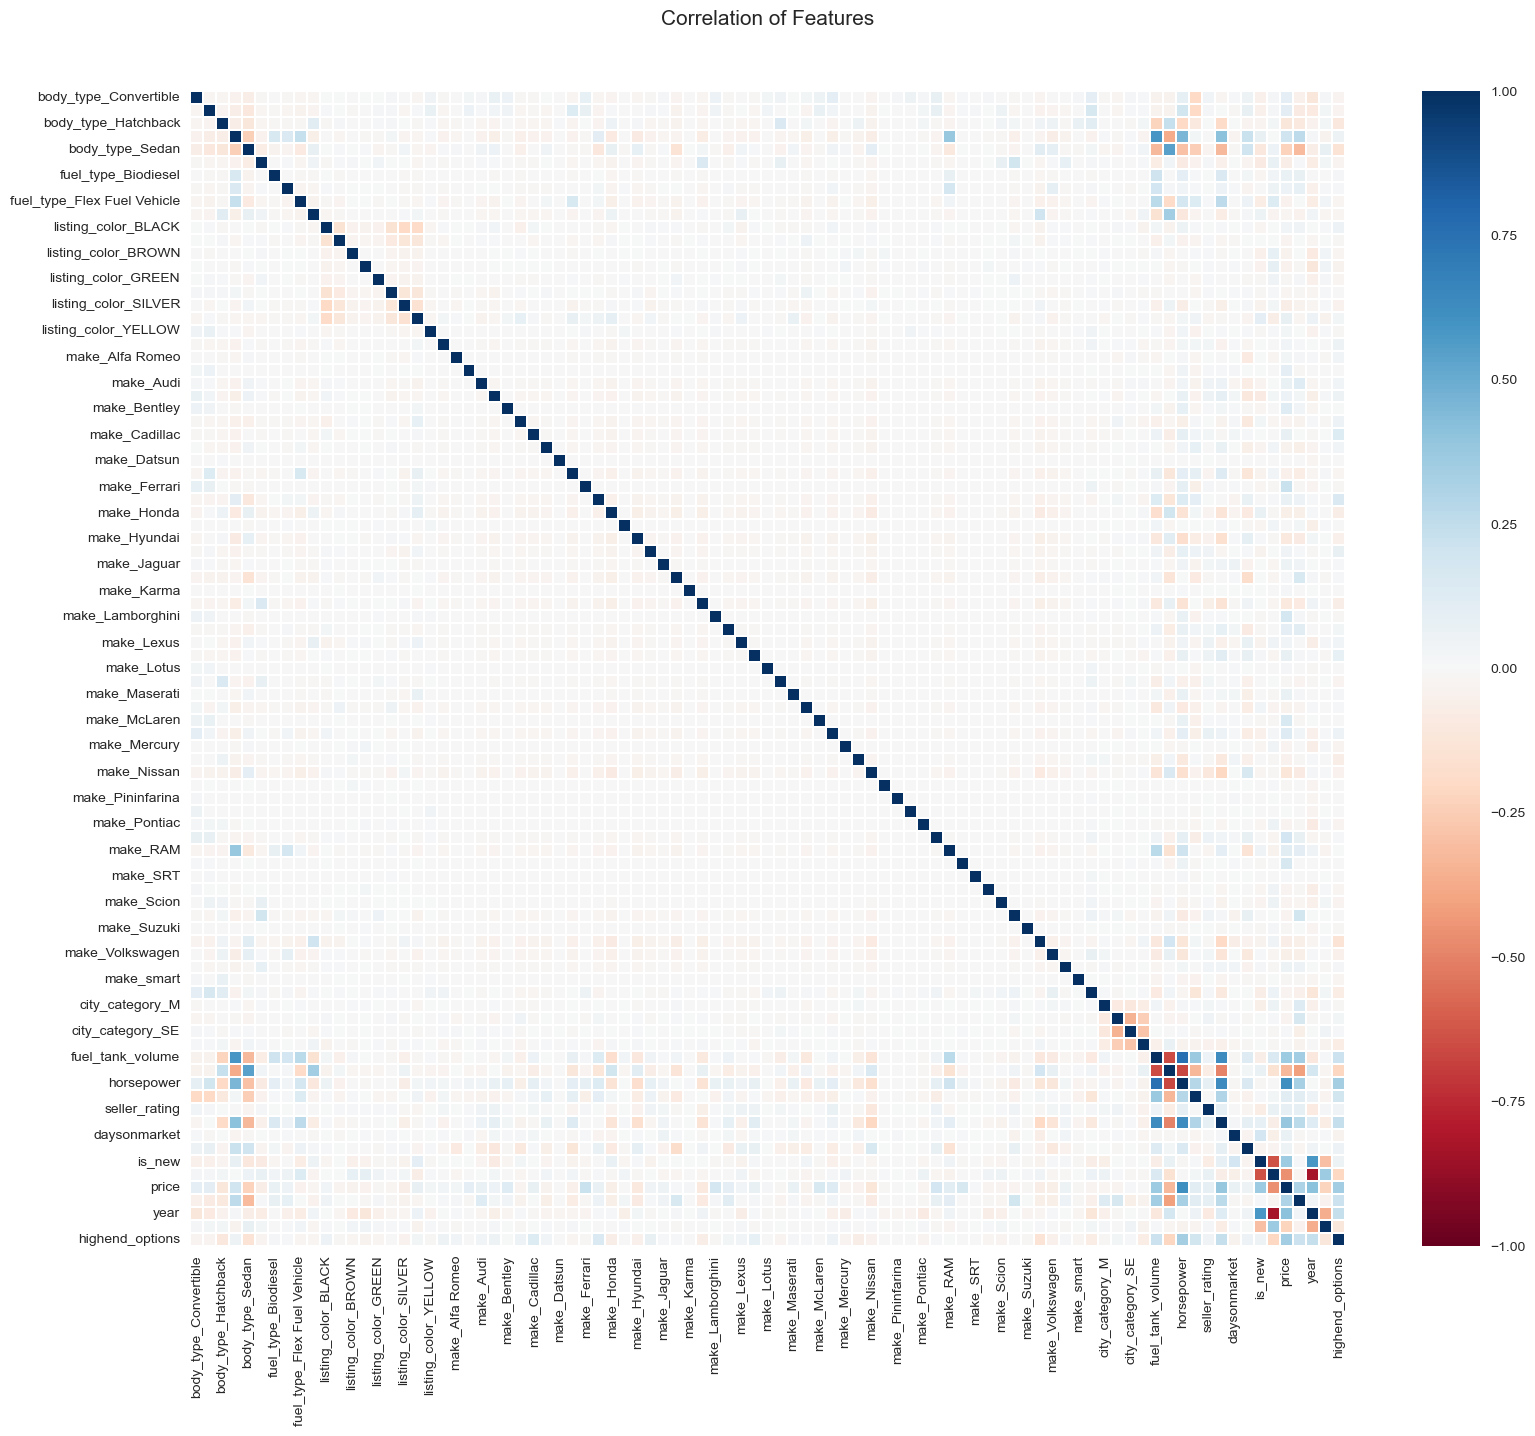

In [70]:
colormap = plt.cm.RdBu
plt.subplots(figsize=(20, 15))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(df_corrMatrix4,linewidths = 0.1, vmax= 1.0, vmin= -1.0, square=True, cmap=colormap, linecolor='white',annot=False)
# Create a Heatmap for the model 4

<Axes: xlabel='Price_Predicted4', ylabel='Residual4'>

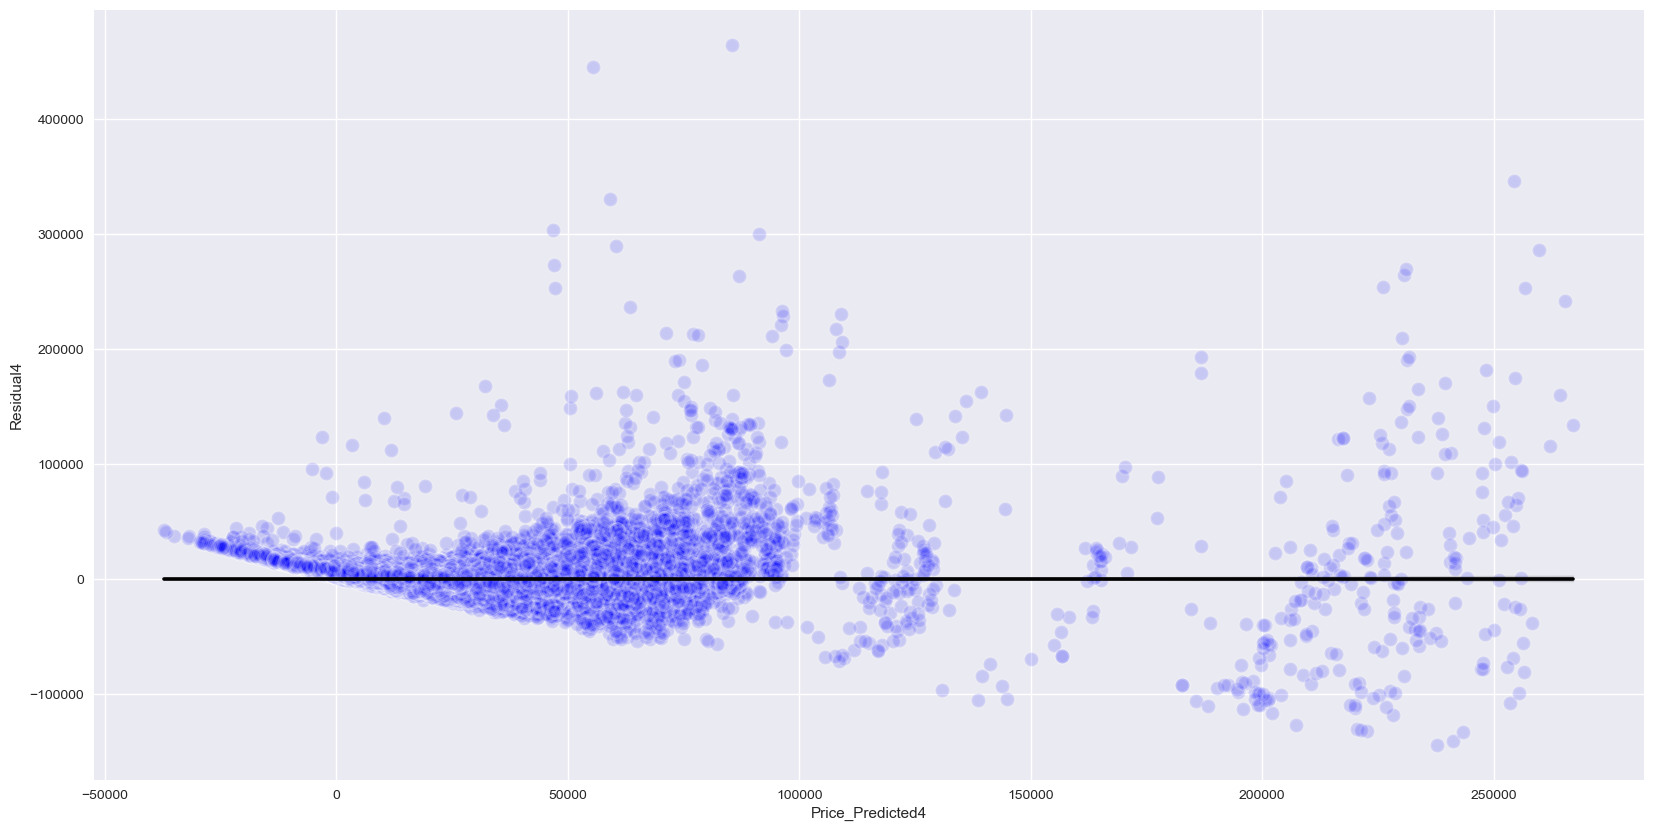

In [71]:
plt.figure(figsize=(20,10)) #changes area of scatterplot
sns.regplot(x='Price_Predicted4', y='Residual4', 
              data = df_reg4, scatter_kws={"color":"blue","alpha":0.15, "s":100,"linewidth":2,"edgecolor":"white"}, 
              line_kws={'color': 'black'})
# create regplot for model 4

In [72]:
vif = pd.DataFrame()
pd.options.display.max_columns = None
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"] = X.columns #adds a column with the labels
round(vif, 1).sort_values(by = 'VIF Factor', ascending = False)
# Create a VIF for the model 4

,VIF Factor,Features
0,1266874.6,const
77,5.0,horsepower
75,4.6,fuel_tank_volume
86,4.4,year
76,4.4,highway_fuel_economy
84,4.1,mileage
80,2.8,width
5,2.4,body_type_Sedan
4,2.4,body_type_Pickup Truck
83,1.9,is_new


## Section 10 - Hypothesis Testing and Final Results
#### Final Model
 - Our final model was a significant predictor of sale price, F(88, 186310) = 6957.0, p < .01, with an R-squared of 0.767, This means that we can account for about 77% of the variation in sale price using this model. 
 - We thought it would be interesting to locate the features that had the highest positive and negative impacts on the sale price. The most postiviely impactful feature was the 'make_Rolls Royce' with a coefficient value of 191900 dollars and the most negatively impactful feature was make_Dodge with a coefficient value of -5344.54 dollars. This means that if everything else is equal, a vehicle made by Dodge would be expected to sell for over 5,000 less than the same vehicle made by a different manufacturer. 

#### Hypothesis Testing
 - Our first hypothesis was that the price of the car would be dependent on the make of the car, with some brands fetching a much higher price than others.
     - All of the regression coefficients for our dummy variables representing car make were significant with p values less than .05. The range of coffecients tells us that the most impactful make is Rolls Royce, which increased the price by 191,900 dollars if all other features are the same, and the least inmpactful make is Buick, which increased the price only by 665 dollars. So, yes, car make definitely influences car price by a large amount.
 - Our second hypothesis was that the vehicle price would increase as the horsepower of the vehicle increases.
     - Based on the coefficient of horsepower, which was 102.16, for each additional one horsepower the price increases by about 102 dollars. It was significant with p less than 0.5.  So, yes, it does impact car price.  For example, using this measure, increasing 100 horsepower would increase the price by 10200 dollars.
 - The third hypothesis was that the price of the vehicle would be dependent on the body type.
    - Based on the coefficients of body type, all were significant with p < 0.5 excluding those dropped due to multicollinearity and lack of significance. SUV/crossover was dropped when the dummy variables were created as it was the most common response, and 'Van' was dropped in Model 3 due to lack of significance. The remaining body types are all significant. The range of coffecients tells us that the most impactful body type is convertible, which increased the price by about 5704 dollars if all other features are the same, and the least impactful body type is Sedan, which decreases the price by about 465 dollars. So, yes, body definitely influences car price by a large, but varied amount.
 - Our final hypothesis was that the price of the vehicle would decrease as the days on the market increase, thinking that if a car sat unpurchased for a longer time, the final sale price might be lower.
     - The results for this feature were surprising. Based on the coefficient of days on market, which was about 3.59, the price of the car would actually increase by 3.59 for each day the car is on the market. This is opposite from our prediction that the price would DECREASE. This feature was significant with p less than 0.5. So, yes, it does impact car price, however this is not the decrease we had expected. So, while days on market does influence price, something else is going on.  